In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
import warnings
warnings.filterwarnings('ignore')

Importing library

## Data Loding and exploration

In [3]:
lead = pd.read_csv('C:/Users/priti/Desktop/PRITI_SWAIN/CSV_FILES/Leads.csv')    # loading the data from csv to lead
lead.head()   # it will show my first five rows

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# First two columns are useless as every row is unique
lead.drop(['Lead Number', 'Prospect ID'], axis=1, inplace=True)

In [5]:
lead.shape   # it will give us the no. of rows and columns

(9240, 35)

In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [7]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


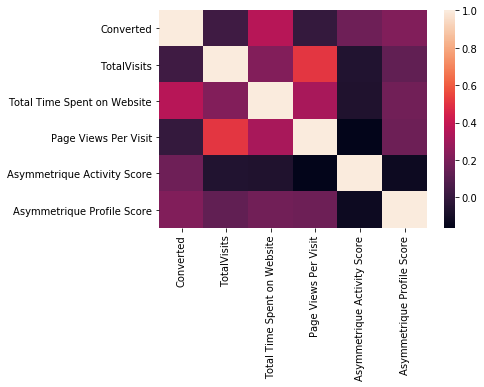

In [8]:
sns.heatmap(lead.corr())

In [9]:
lead.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

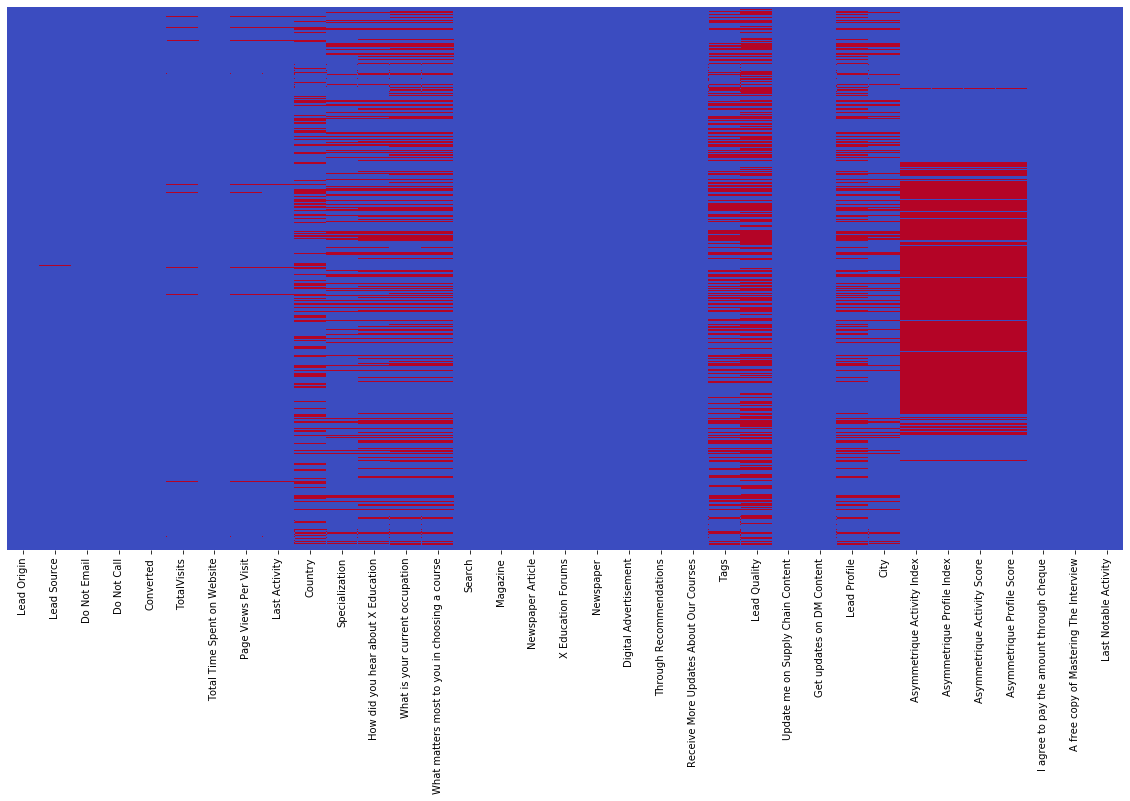

In [10]:
plt.figure(figsize=[20,10])
sns.heatmap(lead.isna(), cbar=False, yticklabels=False, cmap='coolwarm')
plt.show()

## Data Analysis and Cleaning

In [11]:
cat = lead.select_dtypes(include=['int64', 'object'])
cat.drop(['Total Time Spent on Website'], axis=1, inplace=True)

0    5679
1    3561
Name: Converted, dtype: int64

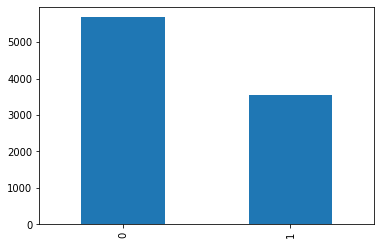

In [12]:
lead['Converted'].value_counts().plot.bar()
lead['Converted'].value_counts()

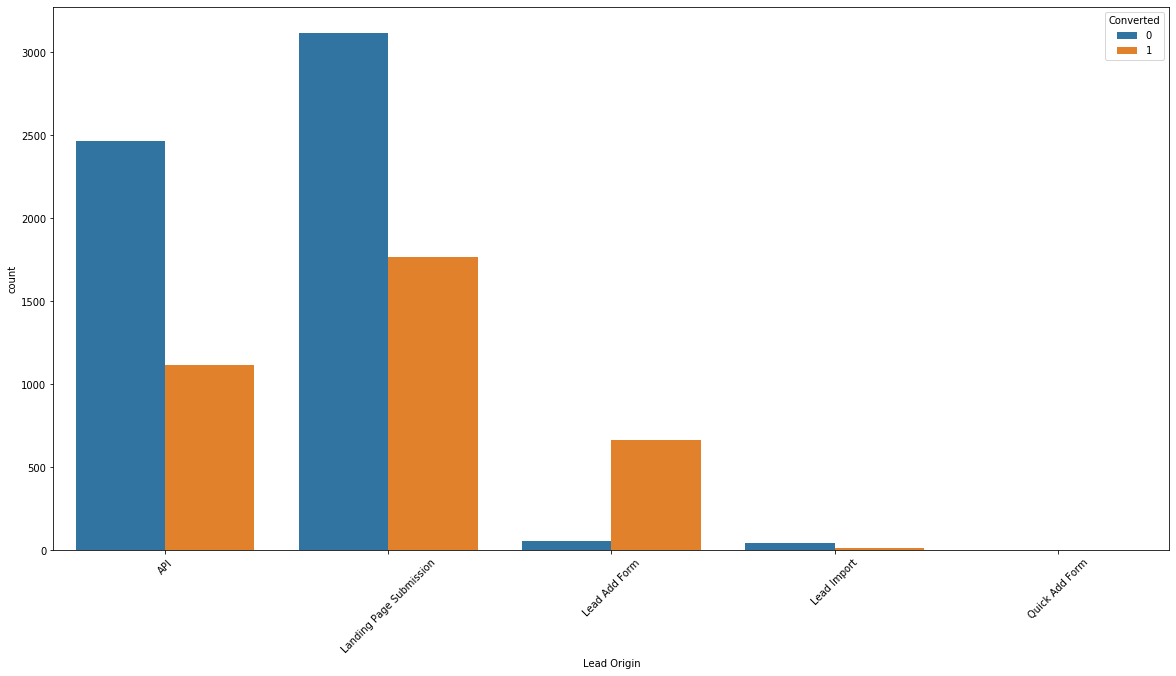

Converted  Lead Origin            
0          API                        2465
           Landing Page Submission    3118
           Lead Add Form                54
           Lead Import                  42
1          API                        1115
           Landing Page Submission    1768
           Lead Add Form               664
           Lead Import                  13
           Quick Add Form                1
Name: Lead Origin, dtype: int64
0


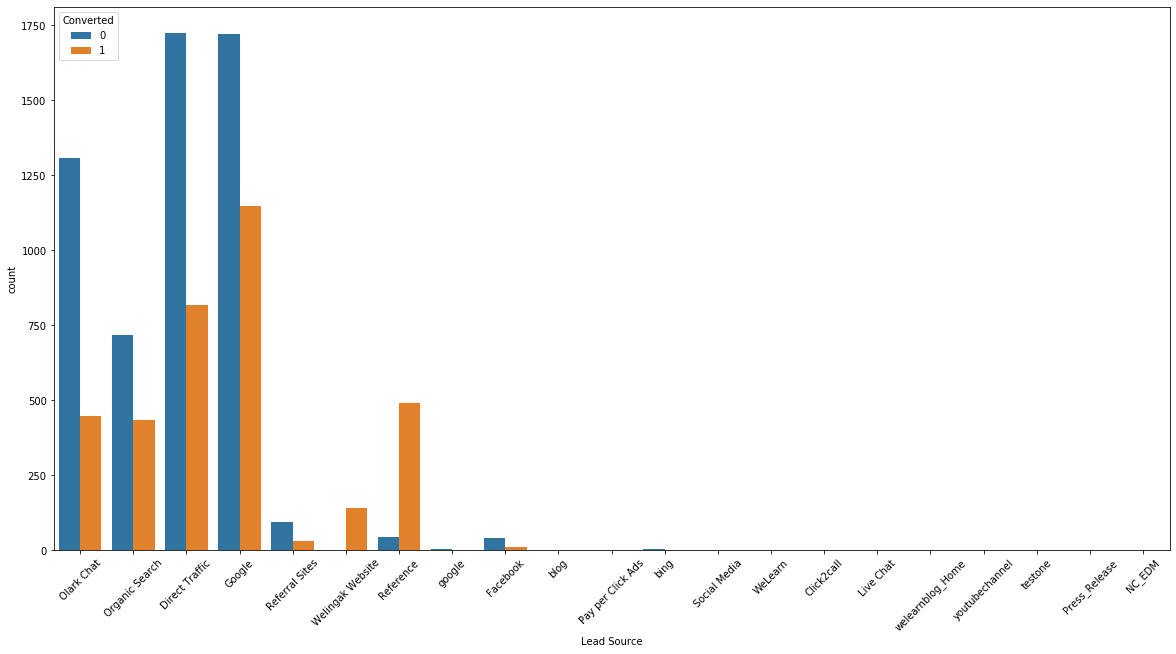

Converted  Lead Source      
0          Click2call              1
           Direct Traffic       1725
           Facebook               42
           Google               1721
           Olark Chat           1307
           Organic Search        718
           Pay per Click Ads       1
           Press_Release           2
           Reference              44
           Referral Sites         94
           Social Media            1
           Welingak Website        2
           bing                    5
           blog                    1
           google                  5
           testone                 1
           welearnblog_Home        1
           youtubechannel          1
1          Click2call              3
           Direct Traffic        818
           Facebook               13
           Google               1147
           Live Chat               2
           NC_EDM                  1
           Olark Chat            448
           Organic Search        436
         

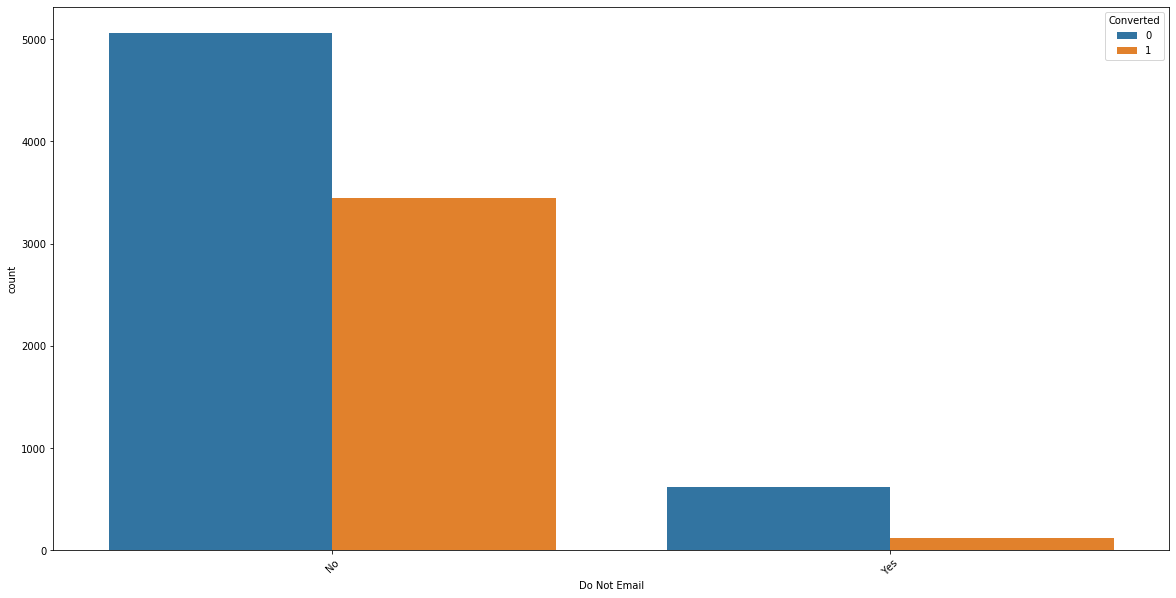

Converted  Do Not Email
0          No              5063
           Yes              616
1          No              3443
           Yes              118
Name: Do Not Email, dtype: int64
0


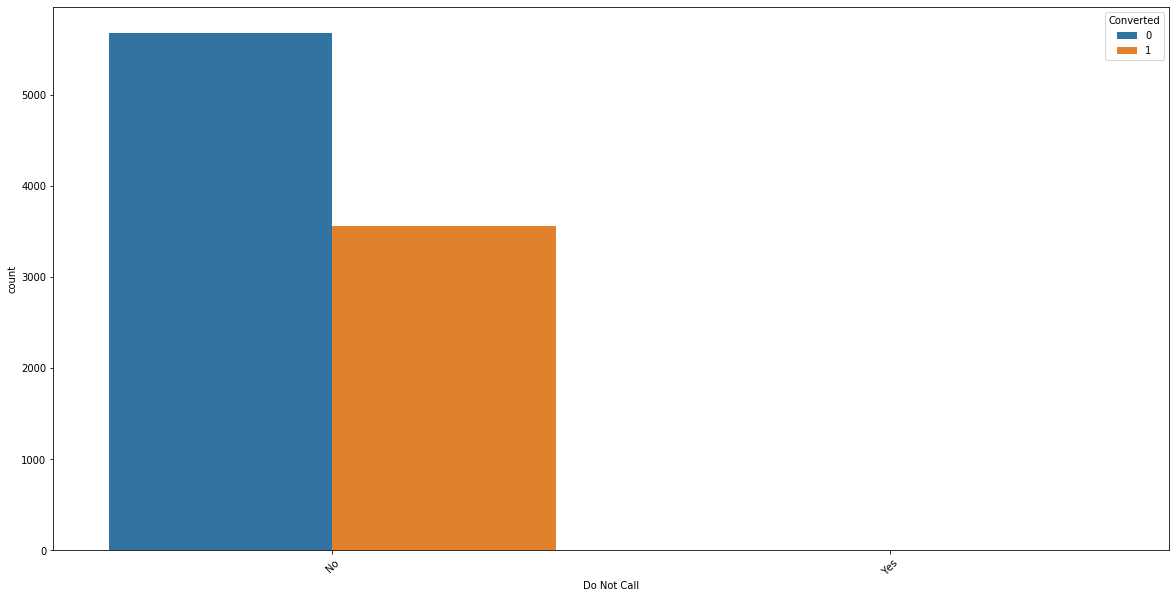

Converted  Do Not Call
0          No             5679
1          No             3559
           Yes               2
Name: Do Not Call, dtype: int64
0


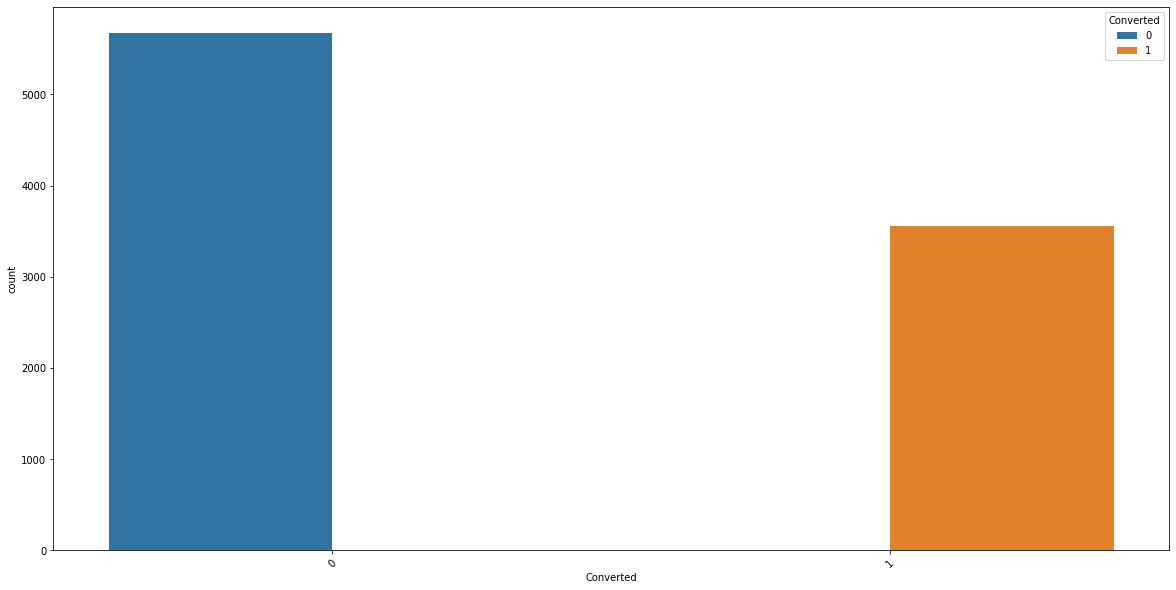

Converted  Converted
0          0            5679
1          1            3561
Name: Converted, dtype: int64
0


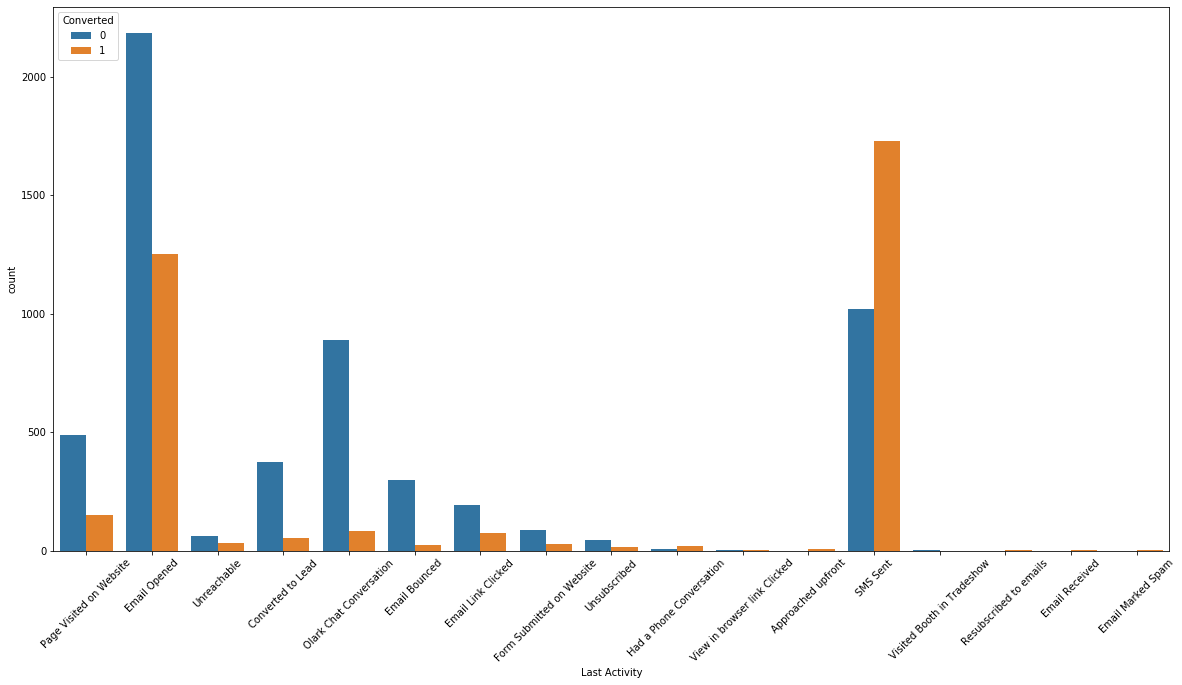

Converted  Last Activity               
0          Converted to Lead                374
           Email Bounced                    300
           Email Link Clicked               194
           Email Opened                    2184
           Form Submitted on Website         88
           Had a Phone Conversation           8
           Olark Chat Conversation          889
           Page Visited on Website          489
           SMS Sent                        1018
           Unreachable                       62
           Unsubscribed                      45
           View in browser link Clicked       5
           Visited Booth in Tradeshow         1
1          Approached upfront                 9
           Converted to Lead                 54
           Email Bounced                     26
           Email Link Clicked                73
           Email Marked Spam                  2
           Email Opened                    1253
           Email Received                     2


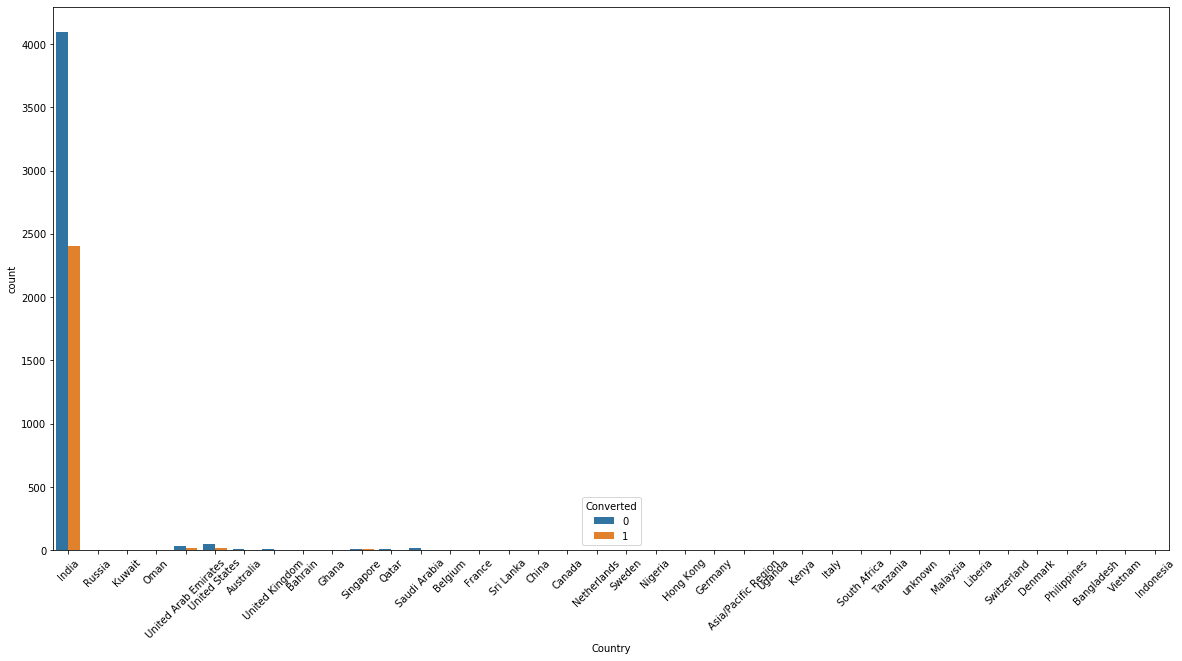

Converted  Country             
0          Asia/Pacific Region        1
           Australia                 10
           Bahrain                    3
           Bangladesh                 1
           Belgium                    2
           Canada                     4
           China                      2
           France                     3
           Germany                    3
           Ghana                      2
           Hong Kong                  3
           India                   4091
           Indonesia                  1
           Italy                      2
           Kenya                      1
           Kuwait                     4
           Liberia                    1
           Malaysia                   1
           Netherlands                1
           Nigeria                    4
           Oman                       3
           Philippines                2
           Qatar                      9
           Russia                     1
        

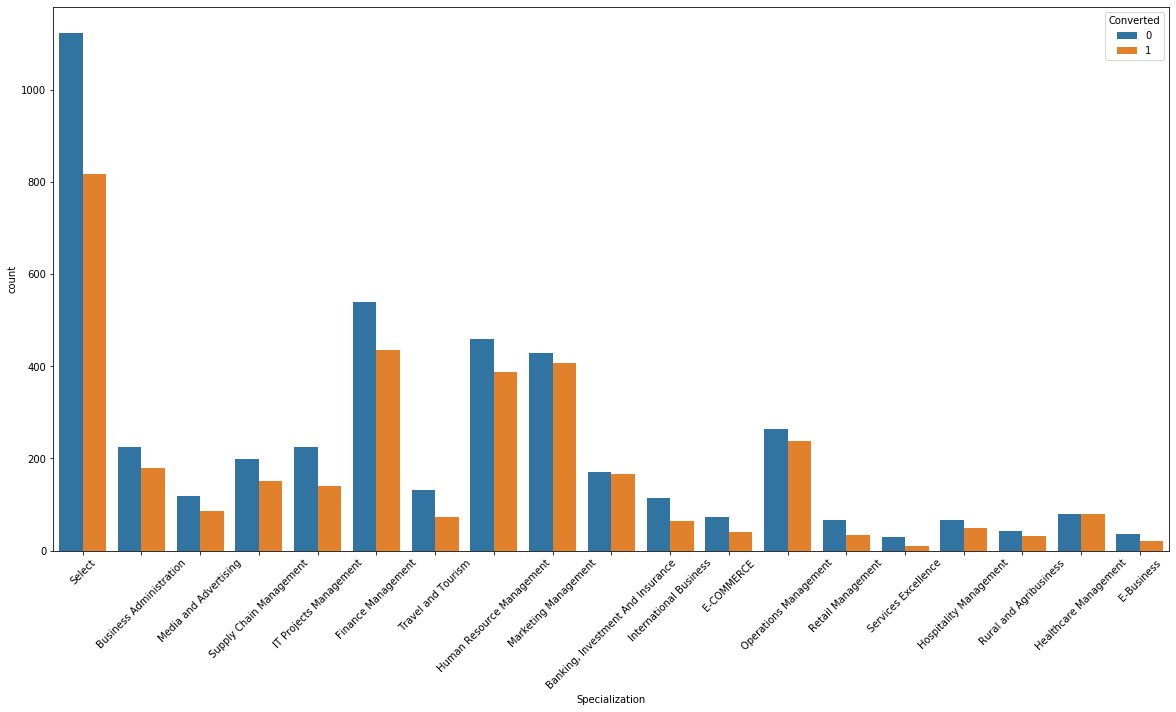

Converted  Specialization                   
0          Banking, Investment And Insurance     171
           Business Administration               224
           E-Business                             36
           E-COMMERCE                             72
           Finance Management                    540
           Healthcare Management                  80
           Hospitality Management                 66
           Human Resource Management             460
           IT Projects Management                226
           International Business                114
           Marketing Management                  430
           Media and Advertising                 118
           Operations Management                 265
           Retail Management                      66
           Rural and Agribusiness                 42
           Select                               1124
           Services Excellence                    29
           Supply Chain Management               198
 

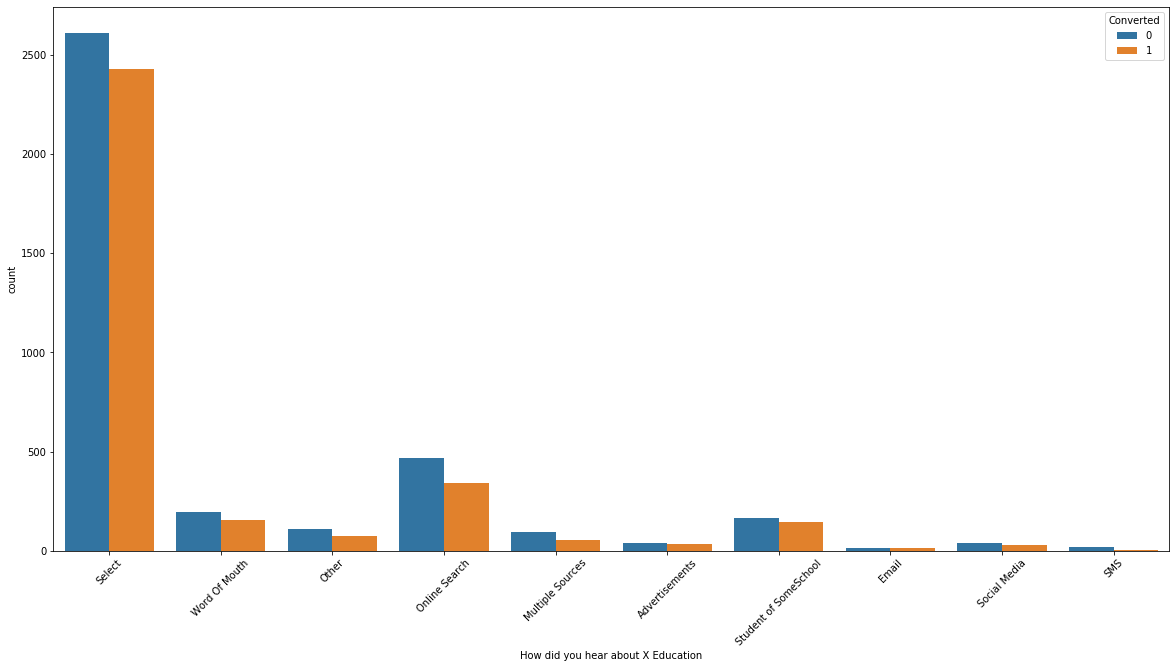

Converted  How did you hear about X Education
0          Advertisements                          38
           Email                                   13
           Multiple Sources                        96
           Online Search                          465
           Other                                  111
           SMS                                     18
           Select                                2612
           Social Media                            39
           Student of SomeSchool                  167
           Word Of Mouth                          196
1          Advertisements                          32
           Email                                   13
           Multiple Sources                        56
           Online Search                          343
           Other                                   75
           SMS                                      5
           Select                                2431
           Social Media             

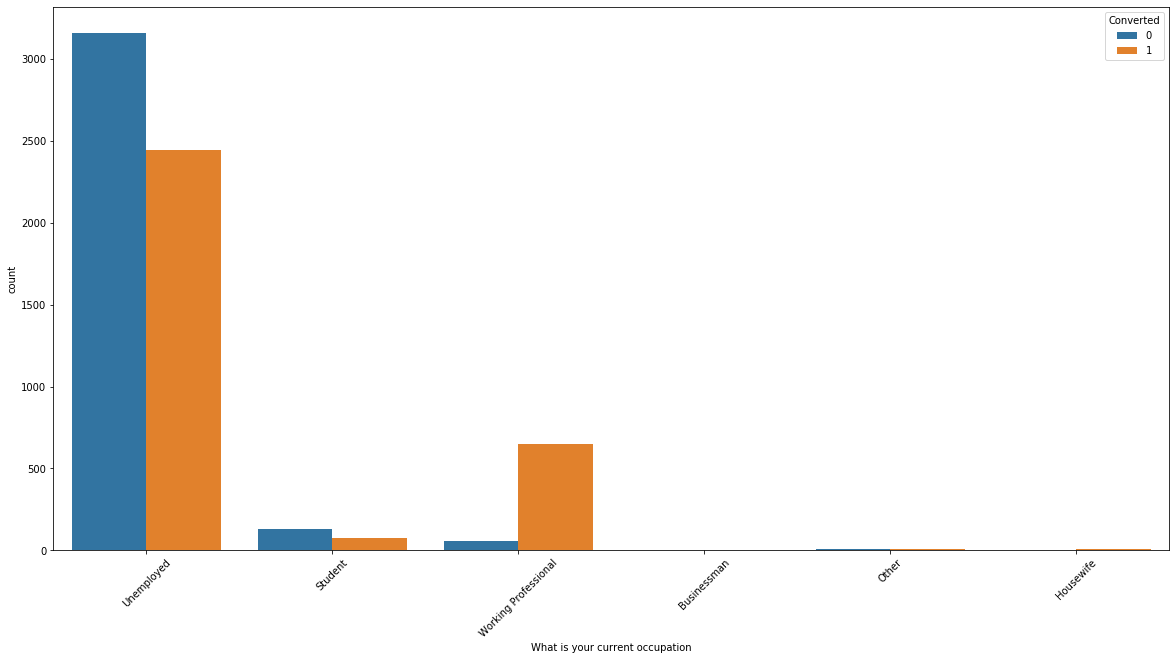

Converted  What is your current occupation
0          Businessman                           3
           Other                                 6
           Student                             132
           Unemployed                         3159
           Working Professional                 59
1          Businessman                           5
           Housewife                            10
           Other                                10
           Student                              78
           Unemployed                         2441
           Working Professional                647
Name: What is your current occupation, dtype: int64
2690


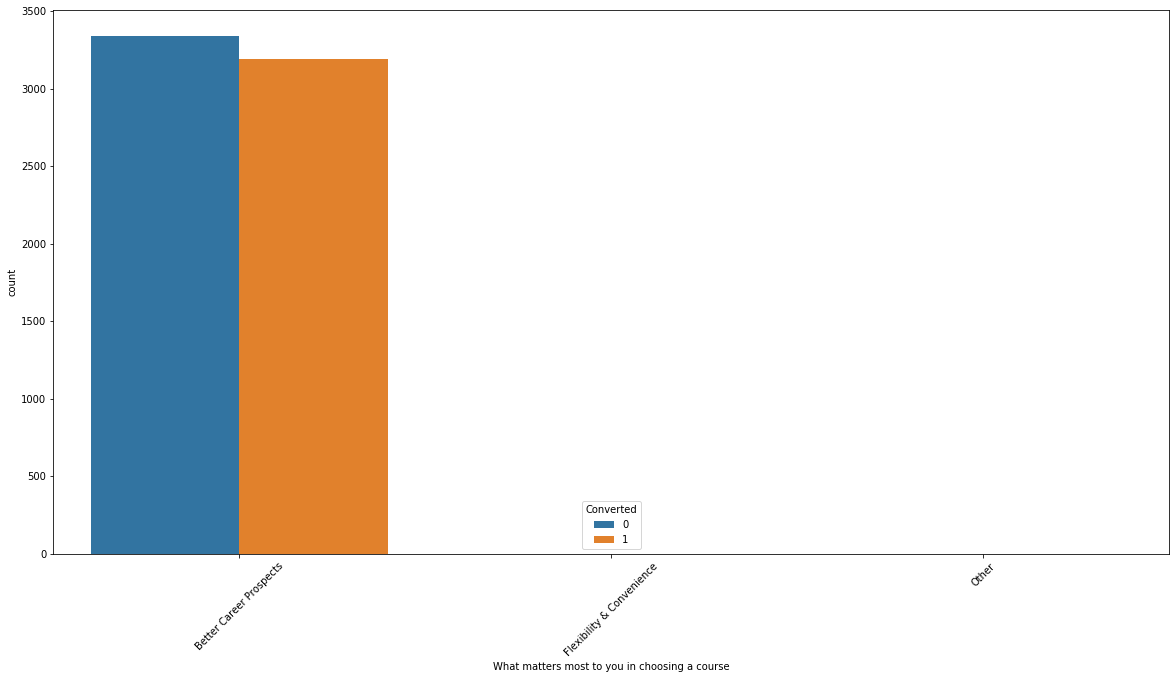

Converted  What matters most to you in choosing a course
0          Better Career Prospects                          3338
           Flexibility & Convenience                           1
           Other                                               1
1          Better Career Prospects                          3190
           Flexibility & Convenience                           1
Name: What matters most to you in choosing a course, dtype: int64
2709


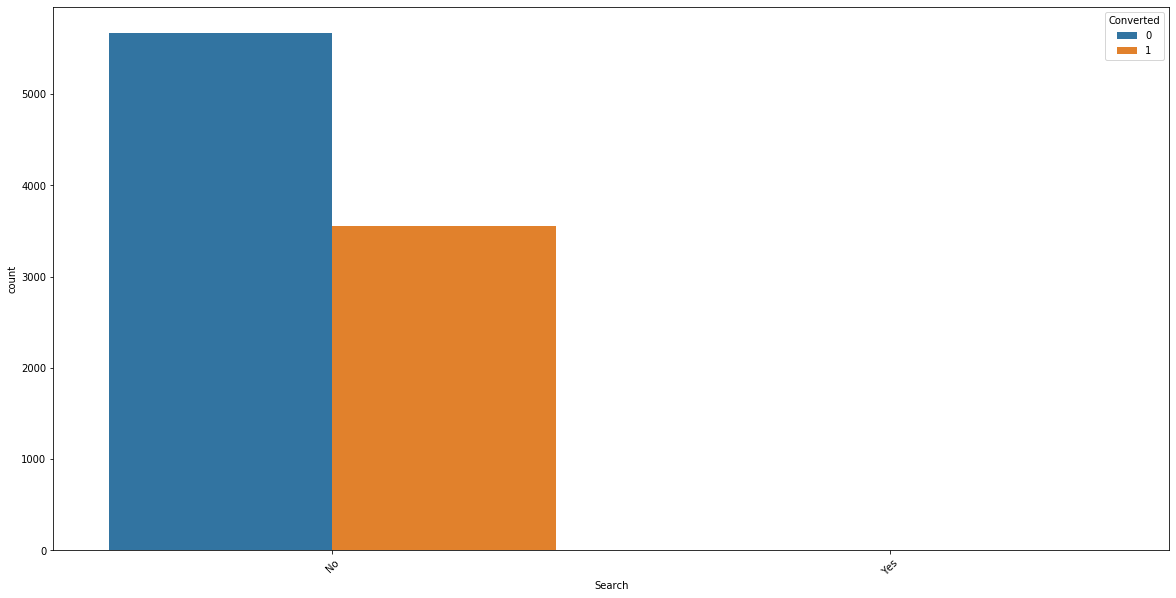

Converted  Search
0          No        5670
           Yes          9
1          No        3556
           Yes          5
Name: Search, dtype: int64
0


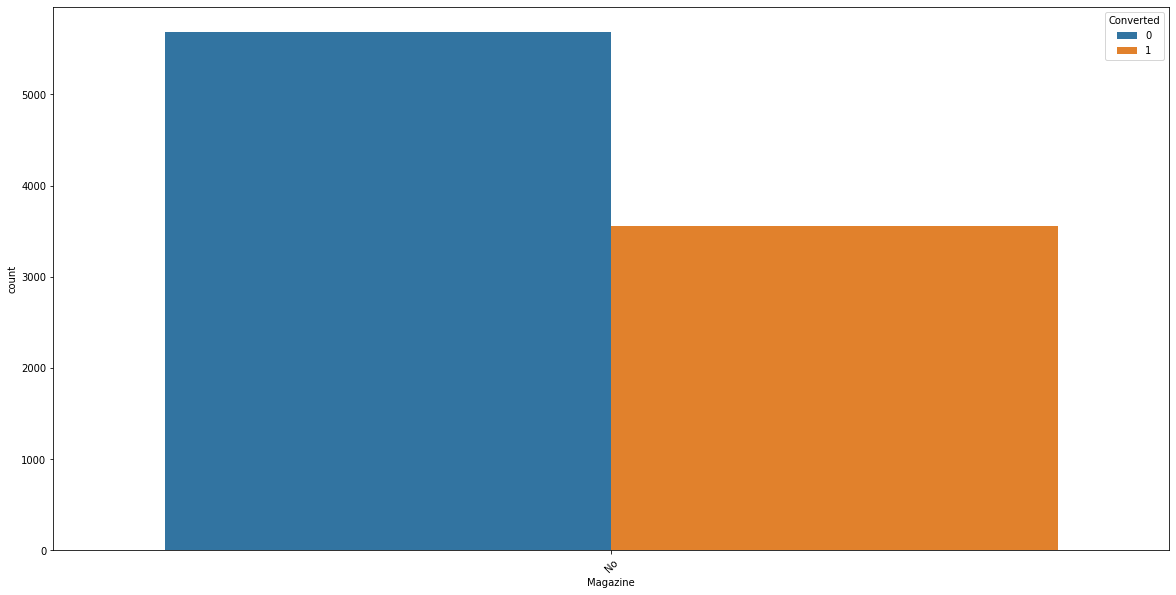

Converted  Magazine
0          No          5679
1          No          3561
Name: Magazine, dtype: int64
0


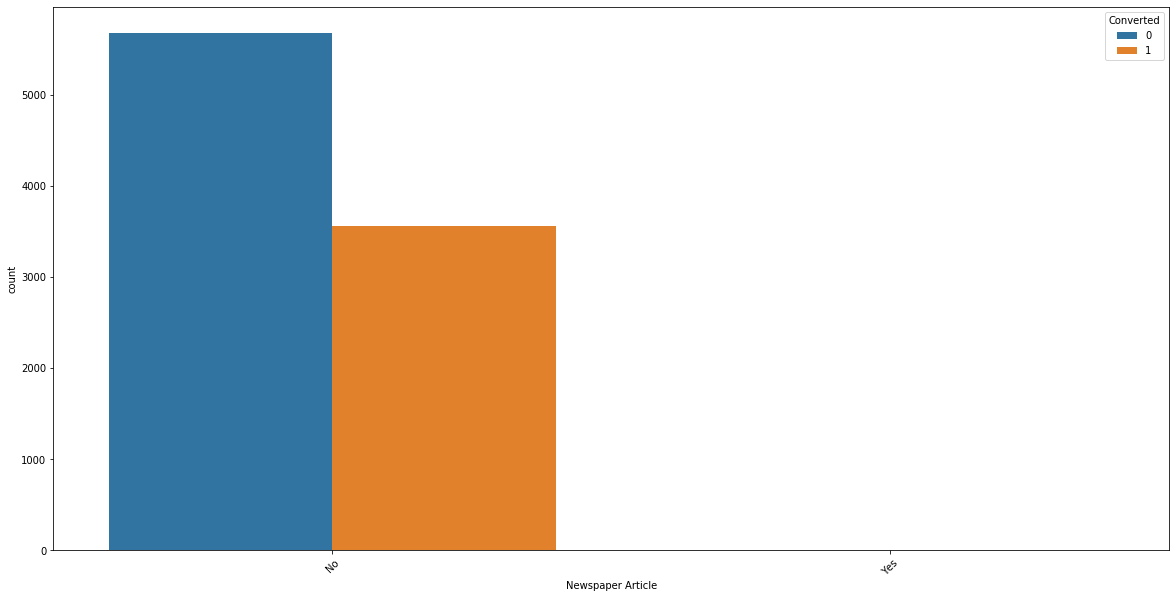

Converted  Newspaper Article
0          No                   5678
           Yes                     1
1          No                   3560
           Yes                     1
Name: Newspaper Article, dtype: int64
0


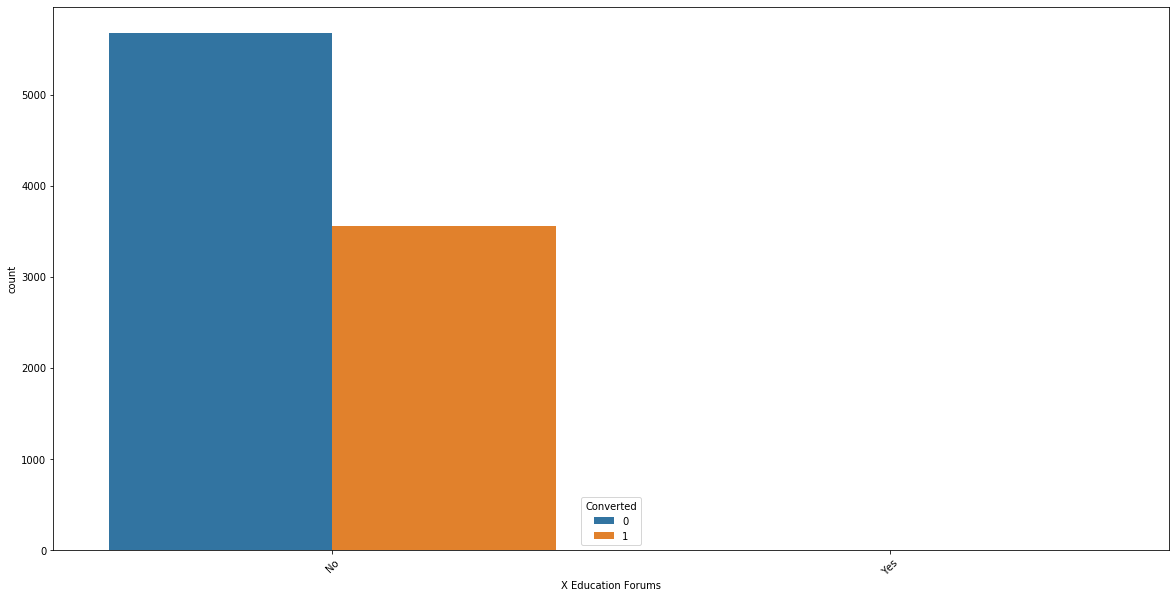

Converted  X Education Forums
0          No                    5678
           Yes                      1
1          No                    3561
Name: X Education Forums, dtype: int64
0


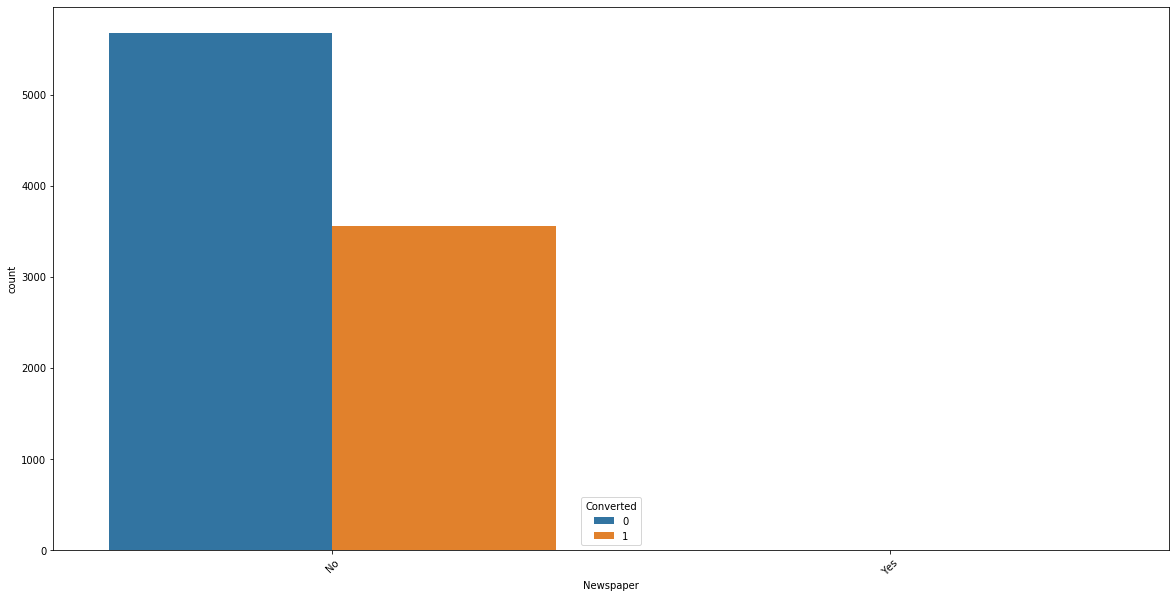

Converted  Newspaper
0          No           5678
           Yes             1
1          No           3561
Name: Newspaper, dtype: int64
0


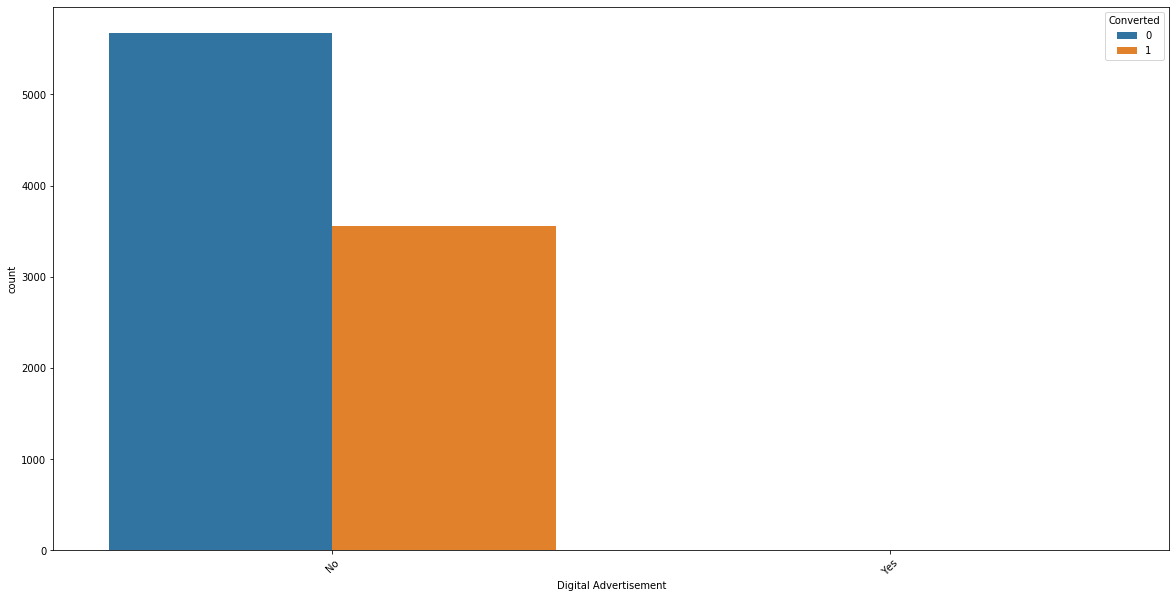

Converted  Digital Advertisement
0          No                       5676
           Yes                         3
1          No                       3560
           Yes                         1
Name: Digital Advertisement, dtype: int64
0


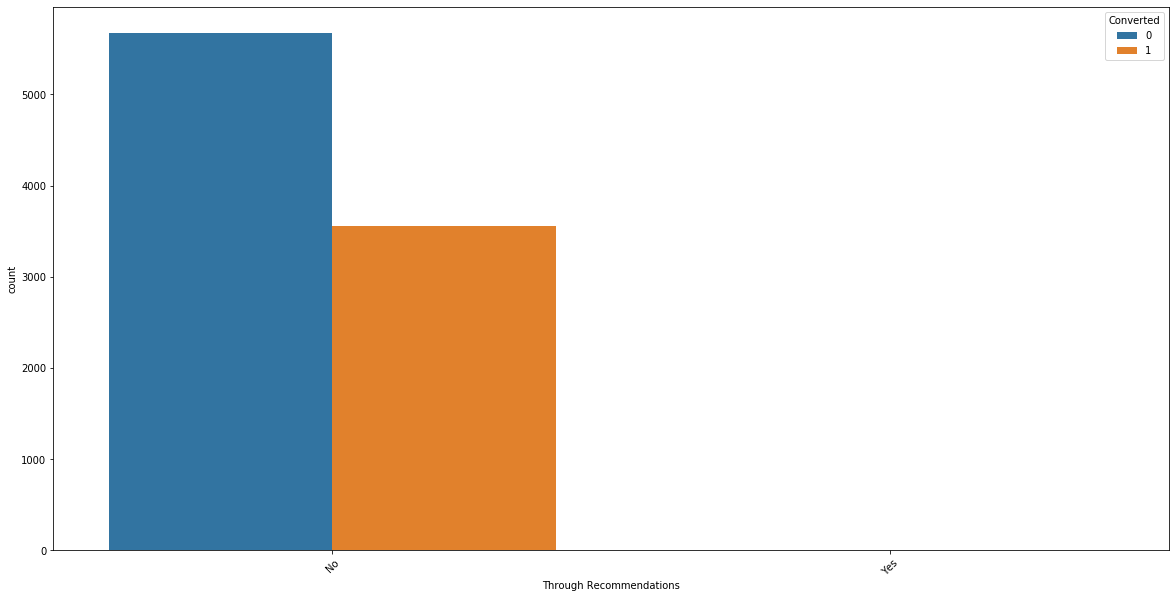

Converted  Through Recommendations
0          No                         5677
           Yes                           2
1          No                         3556
           Yes                           5
Name: Through Recommendations, dtype: int64
0


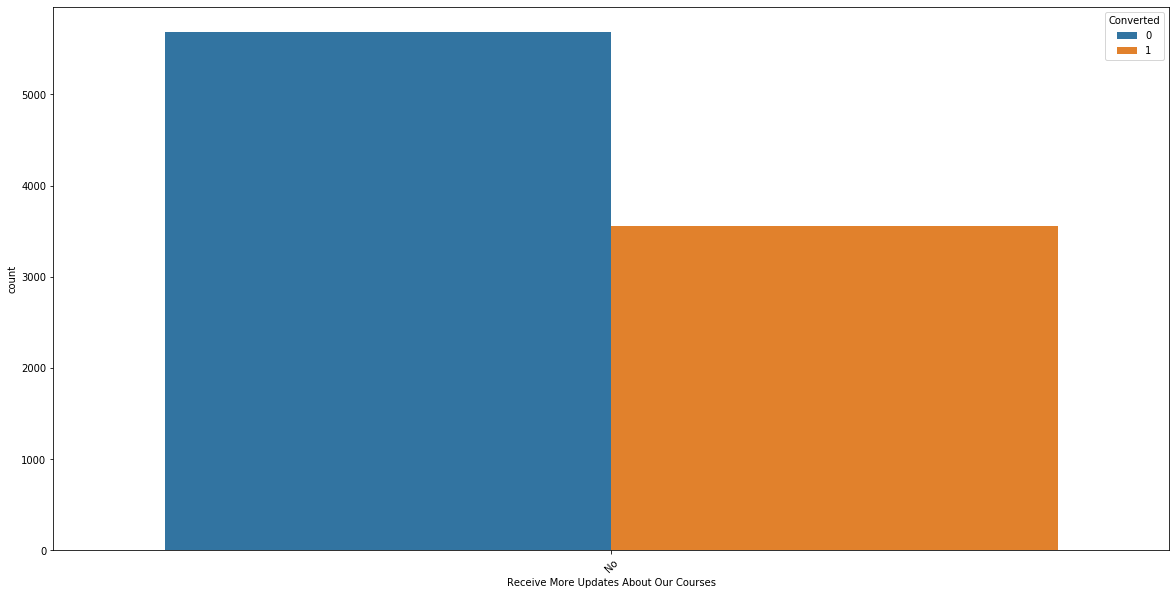

Converted  Receive More Updates About Our Courses
0          No                                        5679
1          No                                        3561
Name: Receive More Updates About Our Courses, dtype: int64
0


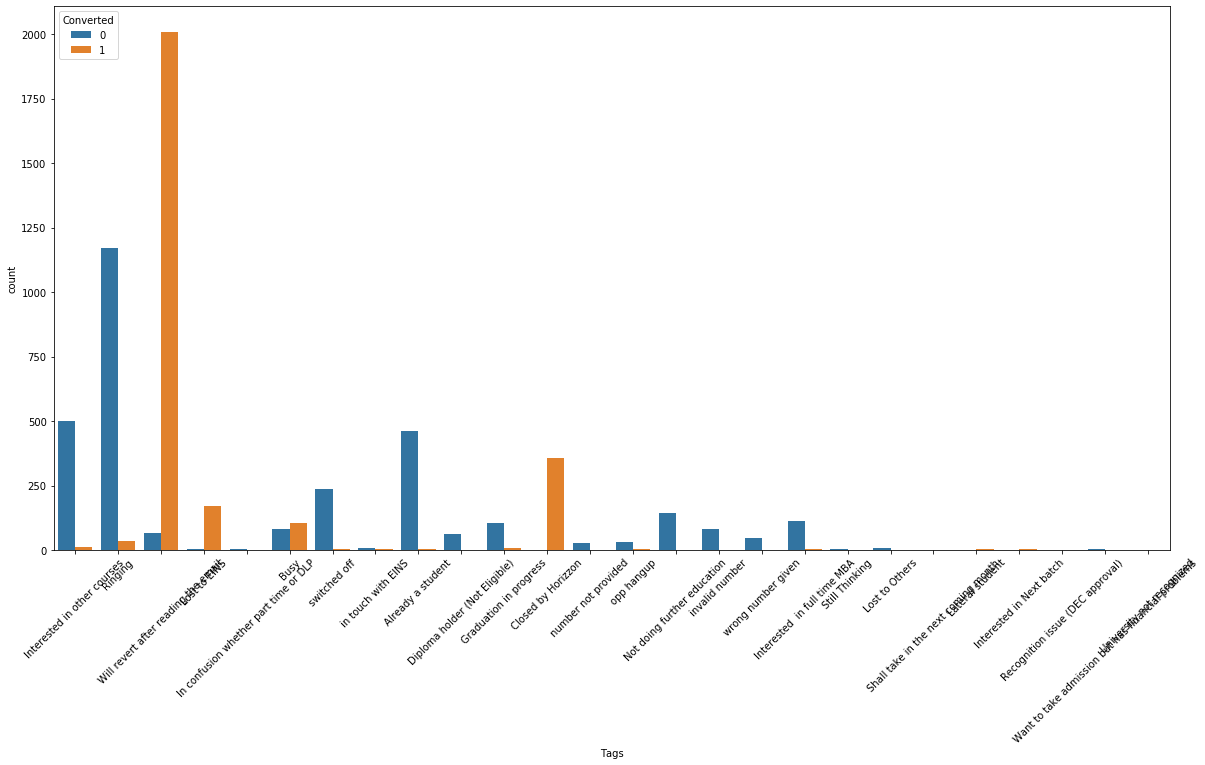

Converted  Tags                                             
0          Already a student                                     462
           Busy                                                   81
           Closed by Horizzon                                      2
           Diploma holder (Not Eligible)                          62
           Graduation in progress                                104
           In confusion whether part time or DLP                   4
           Interested  in full time MBA                          114
           Interested in other courses                           500
           Lost to EINS                                            4
           Lost to Others                                          7
           Not doing further education                           144
           Recognition issue (DEC approval)                        1
           Ringing                                              1169
           Shall take in the next coming m

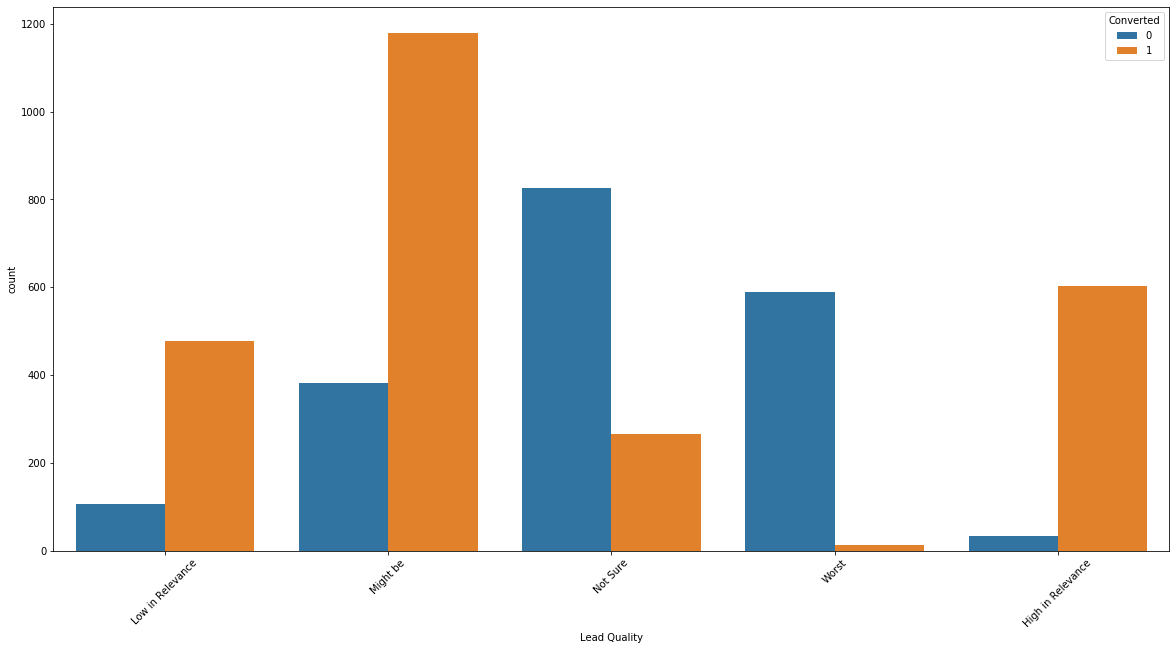

Converted  Lead Quality     
0          High in Relevance      34
           Low in Relevance      106
           Might be              381
           Not Sure              826
           Worst                 589
1          High in Relevance     603
           Low in Relevance      477
           Might be             1179
           Not Sure              266
           Worst                  12
Name: Lead Quality, dtype: int64
4767


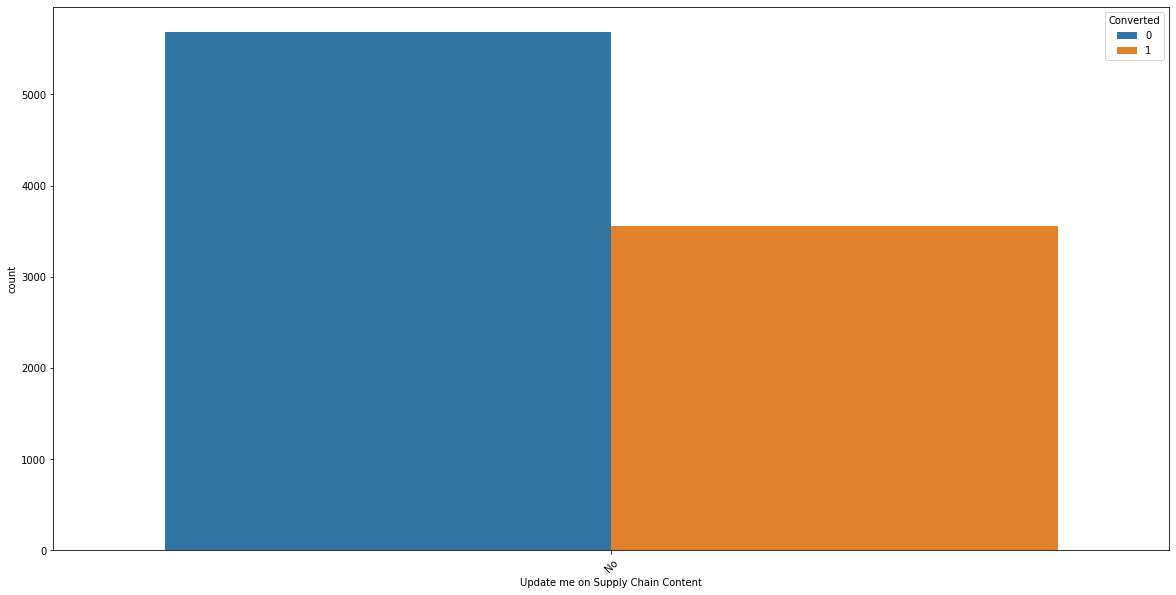

Converted  Update me on Supply Chain Content
0          No                                   5679
1          No                                   3561
Name: Update me on Supply Chain Content, dtype: int64
0


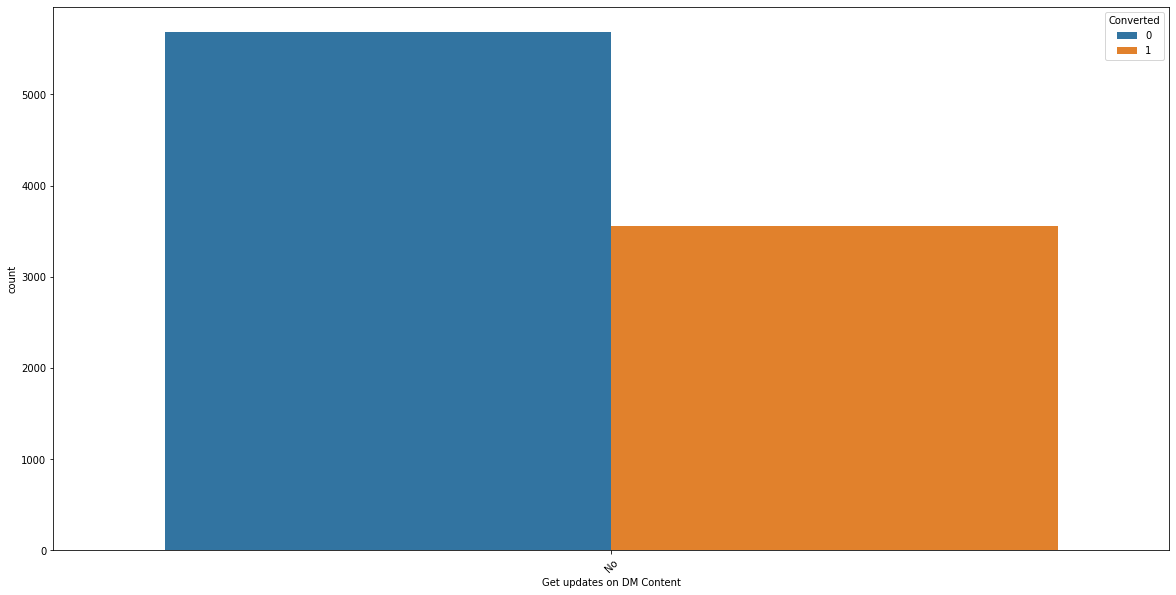

Converted  Get updates on DM Content
0          No                           5679
1          No                           3561
Name: Get updates on DM Content, dtype: int64
0


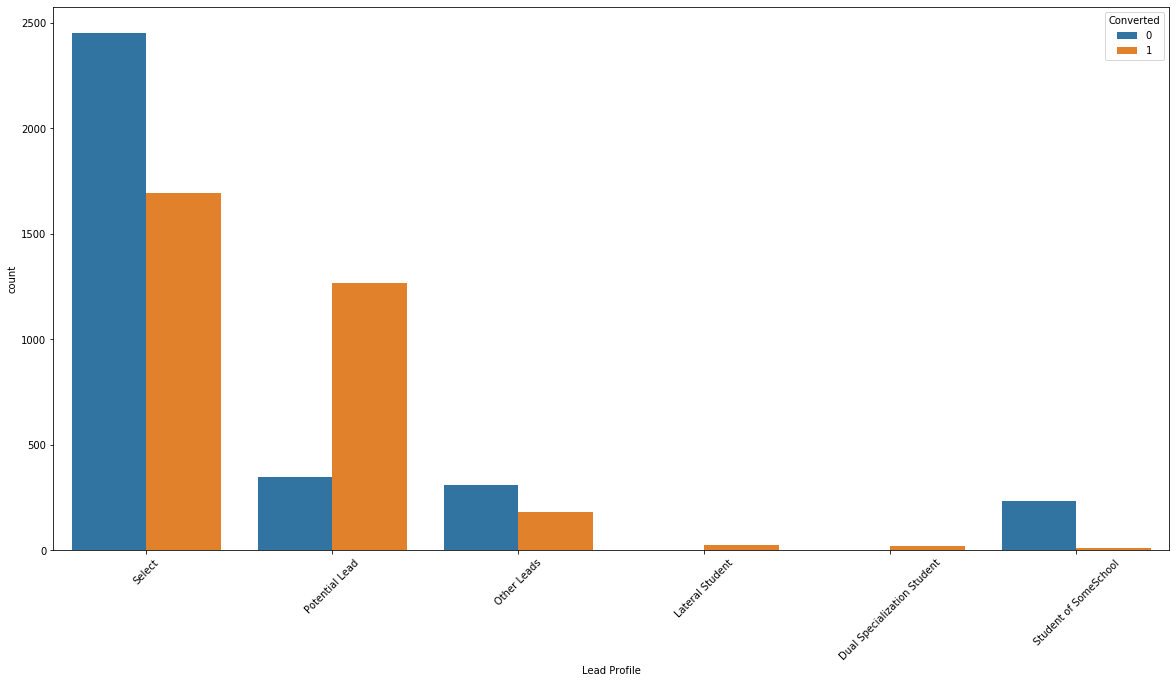

Converted  Lead Profile               
0          Lateral Student                   1
           Other Leads                     307
           Potential Lead                  346
           Select                         2454
           Student of SomeSchool           232
1          Dual Specialization Student      20
           Lateral Student                  23
           Other Leads                     180
           Potential Lead                 1267
           Select                         1692
           Student of SomeSchool             9
Name: Lead Profile, dtype: int64
2709


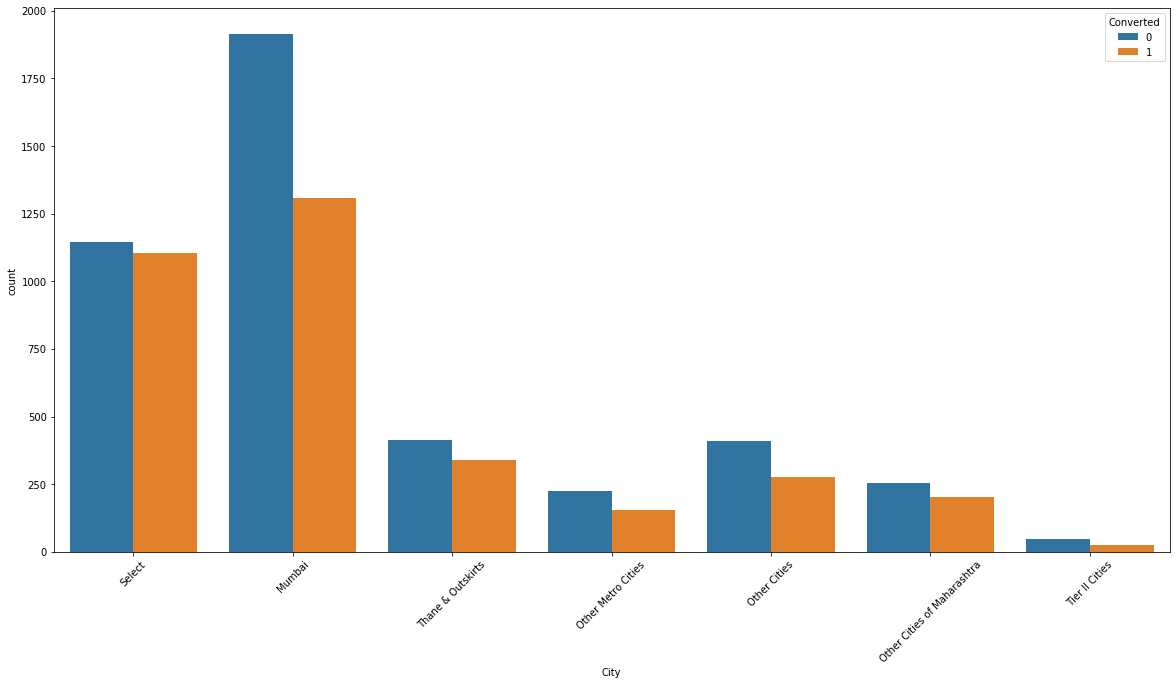

Converted  City                       
0          Mumbai                         1913
           Other Cities                    410
           Other Cities of Maharashtra     256
           Other Metro Cities              225
           Select                         1146
           Thane & Outskirts               414
           Tier II Cities                   49
1          Mumbai                         1309
           Other Cities                    276
           Other Cities of Maharashtra     201
           Other Metro Cities              155
           Select                         1103
           Thane & Outskirts               338
           Tier II Cities                   25
Name: City, dtype: int64
1420


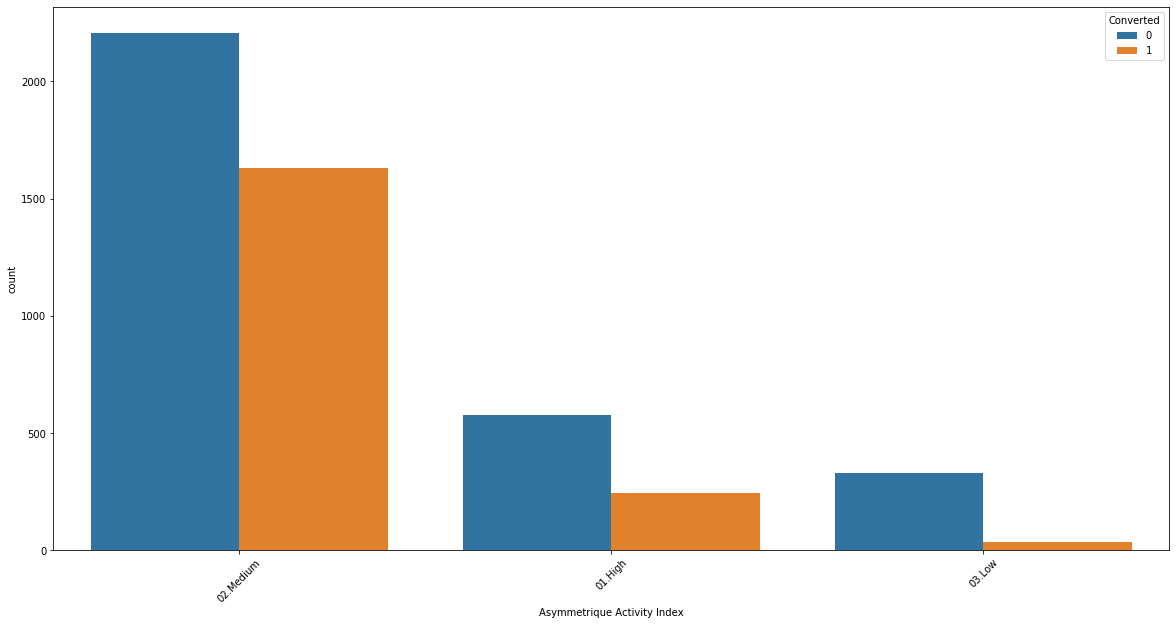

Converted  Asymmetrique Activity Index
0          01.High                         576
           02.Medium                      2209
           03.Low                          329
1          01.High                         245
           02.Medium                      1630
           03.Low                           33
Name: Asymmetrique Activity Index, dtype: int64
4218


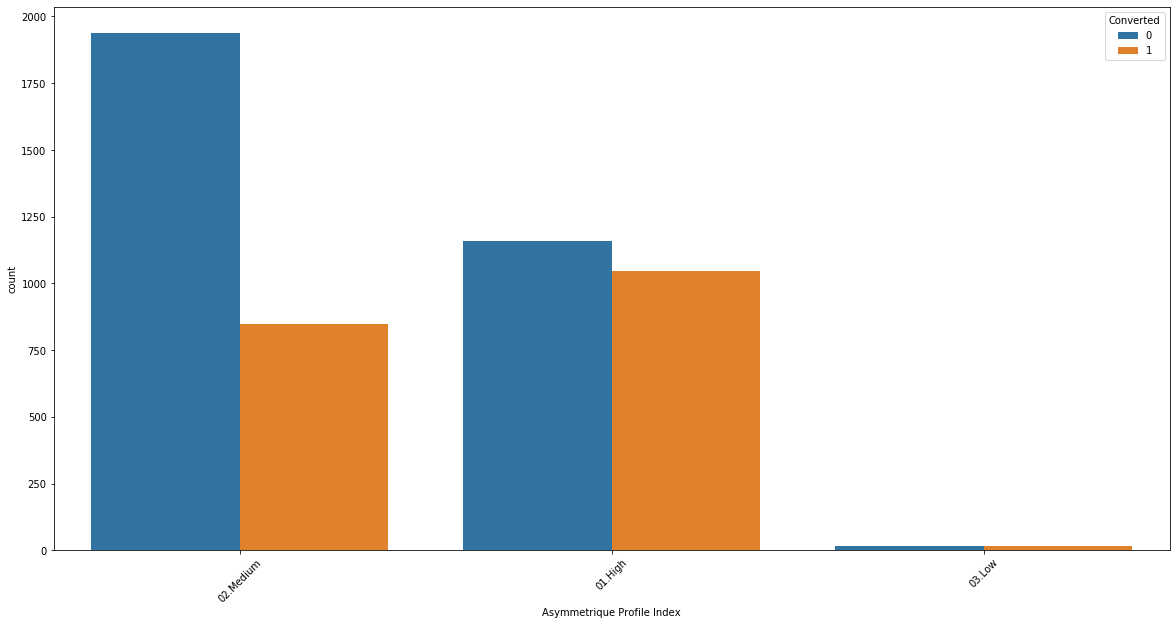

Converted  Asymmetrique Profile Index
0          01.High                       1158
           02.Medium                     1940
           03.Low                          16
1          01.High                       1045
           02.Medium                      848
           03.Low                          15
Name: Asymmetrique Profile Index, dtype: int64
4218


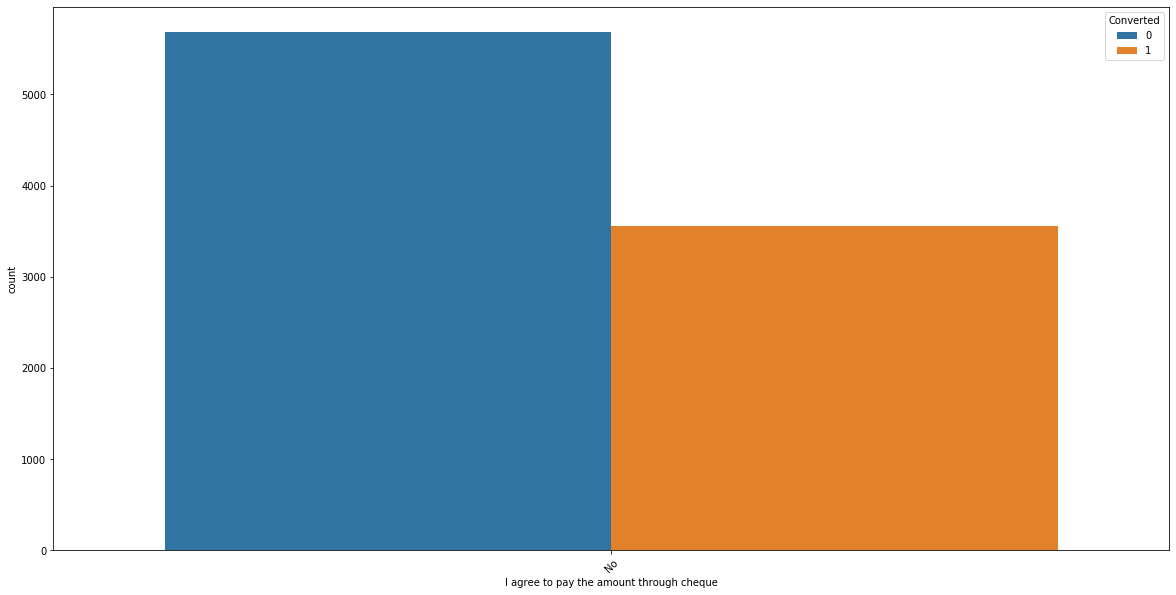

Converted  I agree to pay the amount through cheque
0          No                                          5679
1          No                                          3561
Name: I agree to pay the amount through cheque, dtype: int64
0


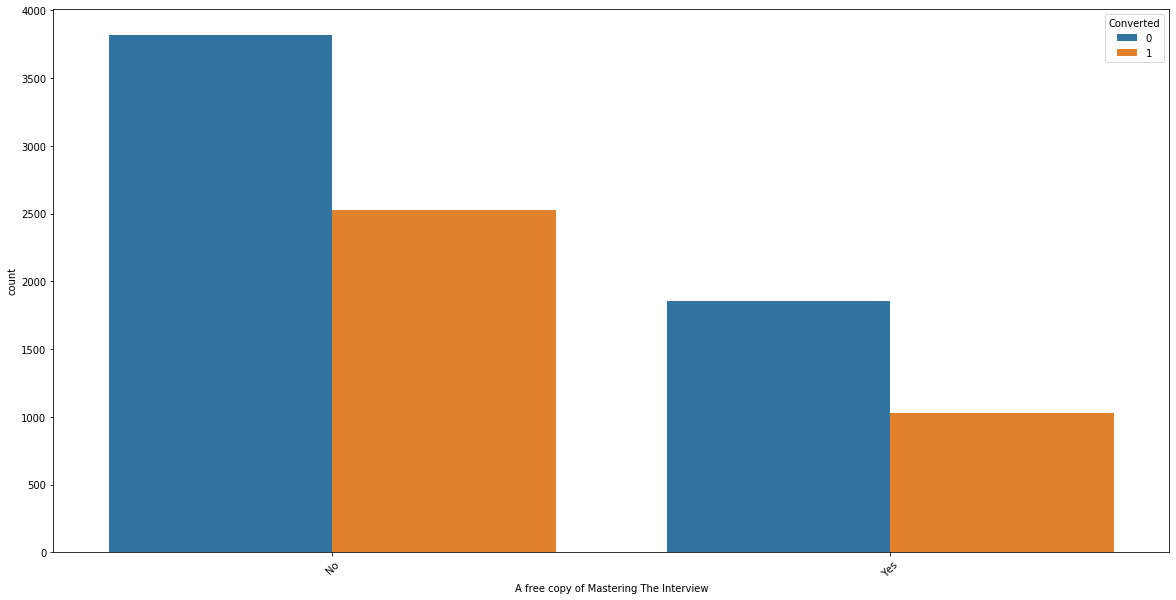

Converted  A free copy of Mastering The Interview
0          No                                        3821
           Yes                                       1858
1          No                                        2531
           Yes                                       1030
Name: A free copy of Mastering The Interview, dtype: int64
0


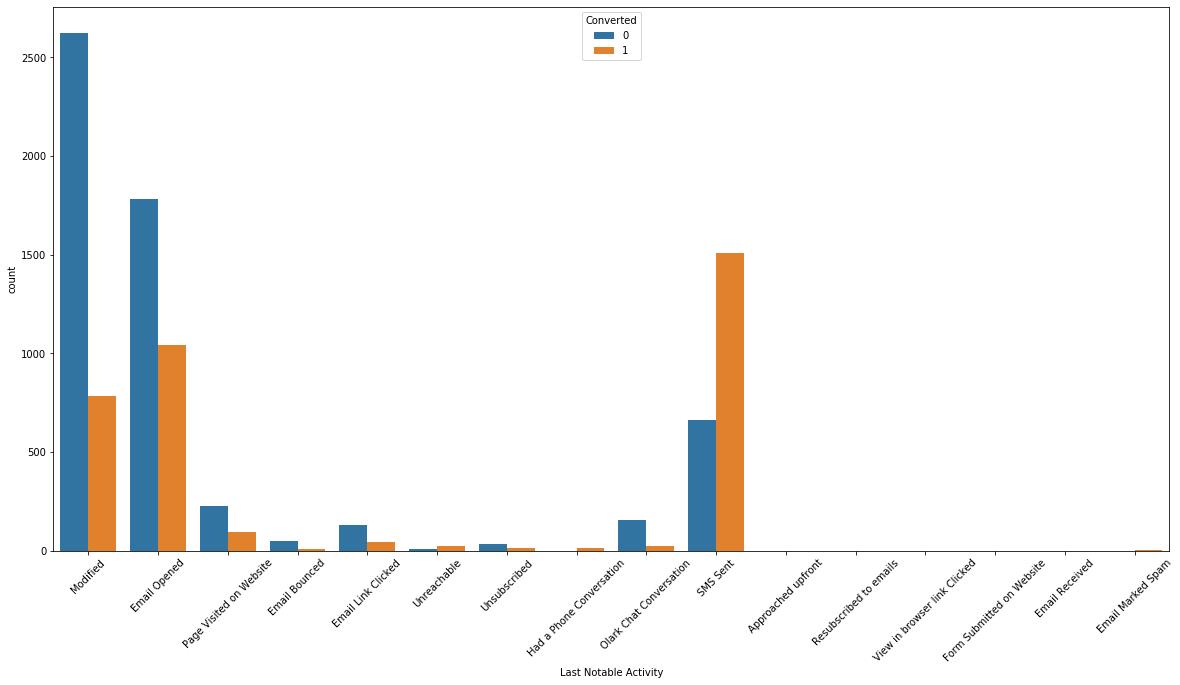

Converted  Last Notable Activity       
0          Email Bounced                     51
           Email Link Clicked               128
           Email Opened                    1783
           Form Submitted on Website          1
           Had a Phone Conversation           1
           Modified                        2624
           Olark Chat Conversation          158
           Page Visited on Website          225
           SMS Sent                         664
           Unreachable                       10
           Unsubscribed                      33
           View in browser link Clicked       1
1          Approached upfront                 1
           Email Bounced                      9
           Email Link Clicked                45
           Email Marked Spam                  2
           Email Opened                    1044
           Email Received                     1
           Had a Phone Conversation          13
           Modified                         783


In [13]:
for i in cat.columns:
    plt.figure(figsize=[20,10])
    sns.countplot(x=i, hue='Converted', data=cat)
    plt.xlabel(i)
    plt.tick_params('x', rotation=45)
    plt.show()
    print(lead.groupby(['Converted',i])[i].count())
    print(lead[i].isna().sum())

In [14]:
# These are the leads which have more than 99.99% data in one category

lead.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Receive More Updates About Our Courses',
          'Update me on Supply Chain Content', 'Magazine','What matters most to you in choosing a course',
           'Search', 'Through Recommendations','Do Not Call', 'Newspaper',
           'X Education Forums','Newspaper Article','Country','Digital Advertisement',
           'Tags'], axis=1, inplace=True)

In [15]:
# These are the leads having high missing data with no relevant information or are already covered by other feature
lead.drop(['Lead Profile','Specialization', 'How did you hear about X Education', 'City','Last Notable Activity'], axis=1, inplace=True)

In [16]:
lead['Lead Source'] = lead['Lead Source'].replace({'Reference':'Other','Welingak Website':'Other',
                                                   'Referral Sites':'Other','Facebook':'Other','bing':'Other',
                                                   'google':'Other','Click2call':'Other','Press_Release':'Other',
                                                   'Live Chat':'Other','Social Media':'Other','WeLearn':'Other',
                                                   'Pay per Click Ads':'Other','youtubechannel':'Other',
                                                   'welearnblog_Home':'Other',
                                                   'NC_EDM':'Other','blog':'Other','testone':'Other'})
lead['Last Activity']=lead['Last Activity'].replace({'Converted to Lead':'Other','Email Bounced':'Other',
                                                     'Email Link Clicked':'Other','Form Submitted on Website':'Other',
                                                     'Unreachable':'Other','Unsubscribed':'Other',
                                                     'Had a Phone Conversation':'Other','Approached upfront':'Other',
                                                     'View in browser link Clicked':'Other','Email Marked Spam':'Other',
                                                     'Email Received':'Other','Visited Booth in Tradeshow':'Other',
                                                     'Resubscribed to emails':'Other'})

In [17]:
lead = lead[lead['Lead Source'].isna()==False]
lead = lead[lead['Last Activity'].isna()==False]

In [18]:
lead['What is your current occupation']=lead['What is your current occupation'].replace({'Student':'Other','Other':'Other',
                                                                                         'Housewife':'Other','Businessman':'Other'})

In [19]:
lead = lead[lead['What is your current occupation'].isna()==False]

In [20]:
lead = lead[lead['TotalVisits'].isna()==False]

In [21]:
lead.shape

(6391, 15)

In [22]:
lead.isna().sum()

Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
What is your current occupation              0
Lead Quality                              2037
Asymmetrique Activity Index               2903
Asymmetrique Profile Index                2903
Asymmetrique Activity Score               2903
Asymmetrique Profile Score                2903
A free copy of Mastering The Interview       0
dtype: int64

In [23]:
cat = lead.select_dtypes(include=['int64', 'object'])
cat.drop(['Total Time Spent on Website'], axis=1, inplace=True)

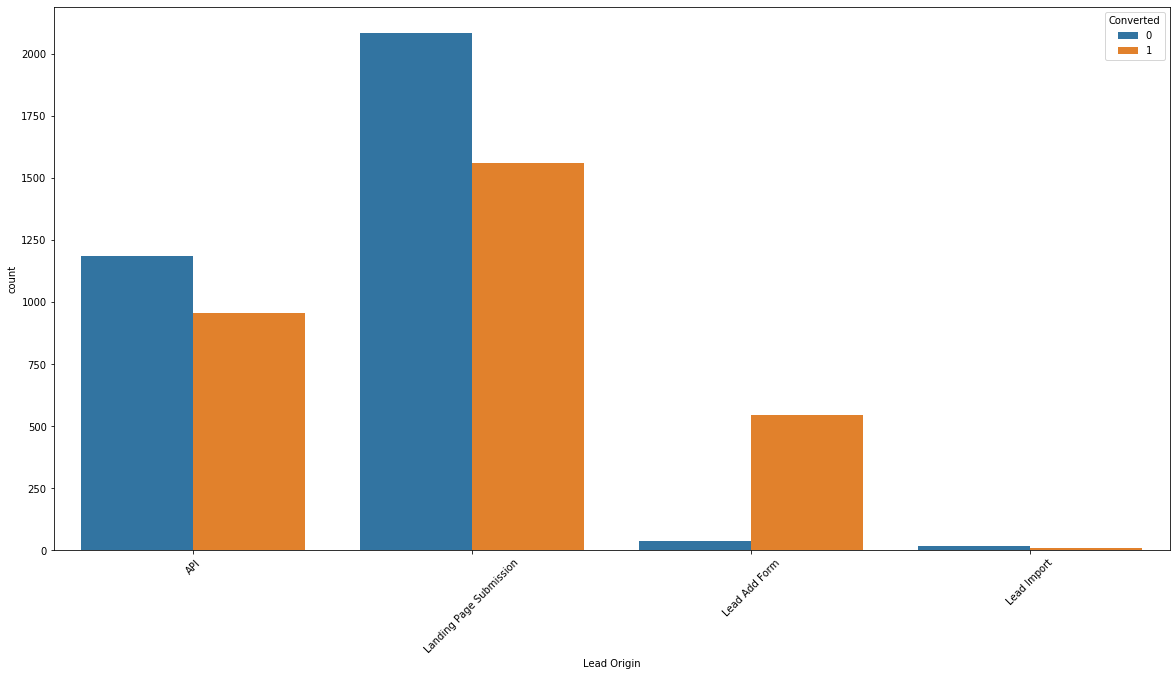

Lead Origin              Converted
API                      0            18.557346
                         1            14.927241
Landing Page Submission  0            32.624003
                         1            24.378032
Lead Add Form            0             0.578939
                         1             8.511970
Lead Import              0             0.281646
                         1             0.140823
Name: Lead Origin, dtype: float64
0.0


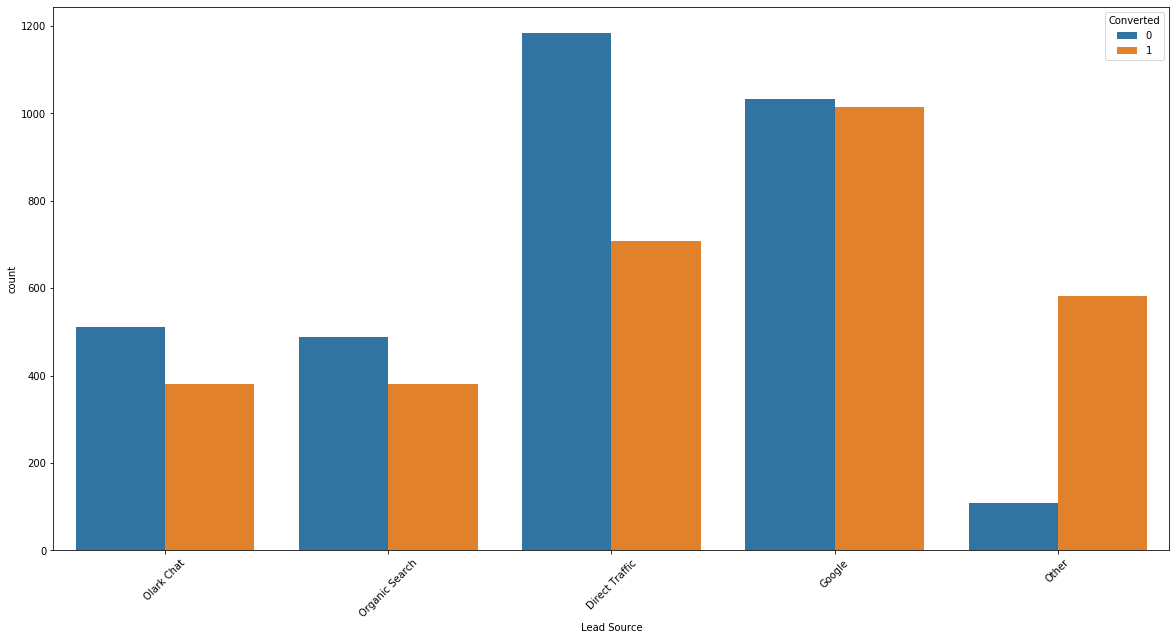

Lead Source     Converted
Direct Traffic  0            18.526052
                1            11.062432
Google          0            16.163355
                1            15.881709
Olark Chat      0             8.011266
                1             5.945861
Organic Search  0             7.651385
                1             5.961508
Other           0             1.689876
                1             9.106556
Name: Lead Source, dtype: float64
0.0


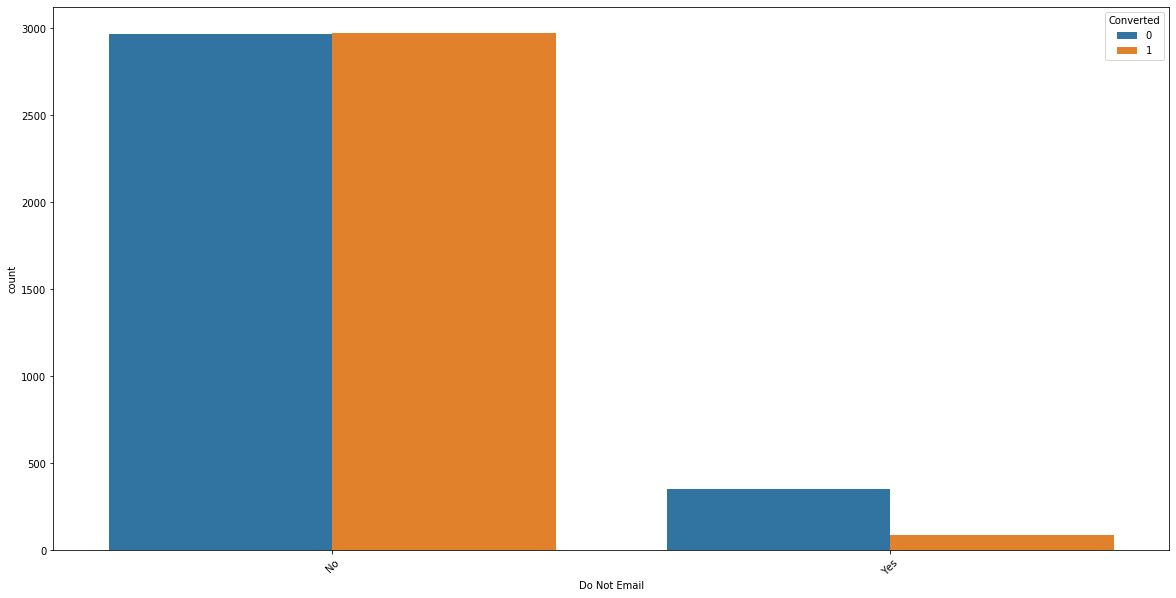

Do Not Email  Converted
No            0            46.471601
              1            46.549836
Yes           0             5.570333
              1             1.408230
Name: Do Not Email, dtype: float64
0.0


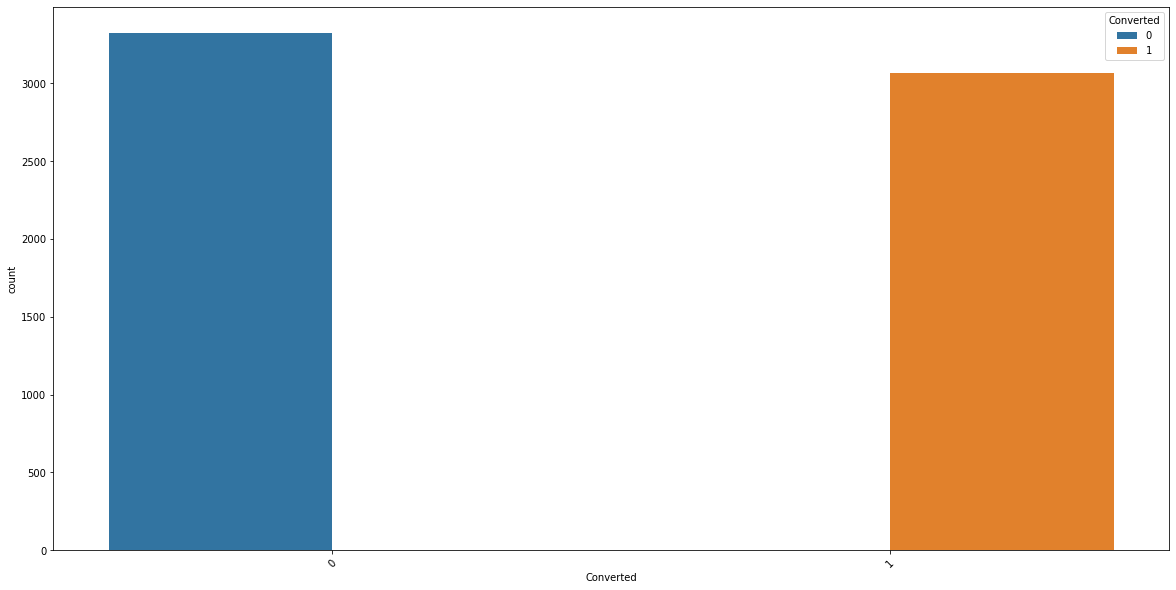

Converted  Converted
0          0            52.041934
1          1            47.958066
Name: Converted, dtype: float64
0.0


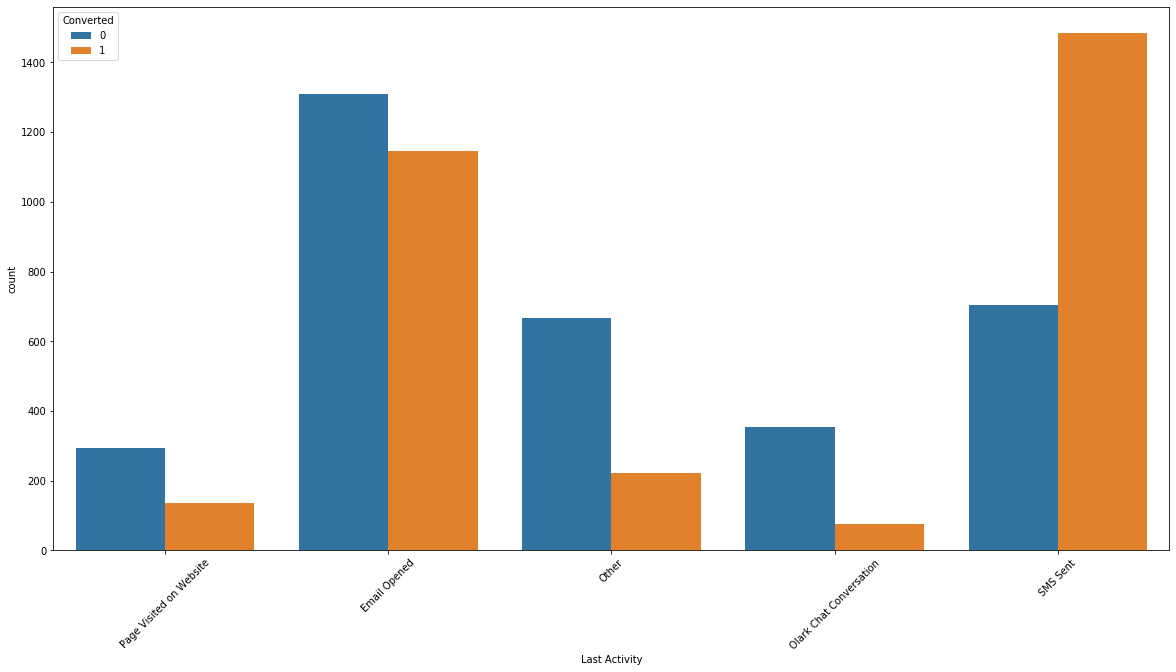

Last Activity            Converted
Email Opened             0            20.481928
                         1            17.931466
Olark Chat Conversation  0             5.523392
                         1             1.173525
Other                    0            10.420904
                         1             3.489282
Page Visited on Website  0             4.584572
                         1             2.127992
SMS Sent                 0            11.031138
                         1            23.235800
Name: Last Activity, dtype: float64
0.0


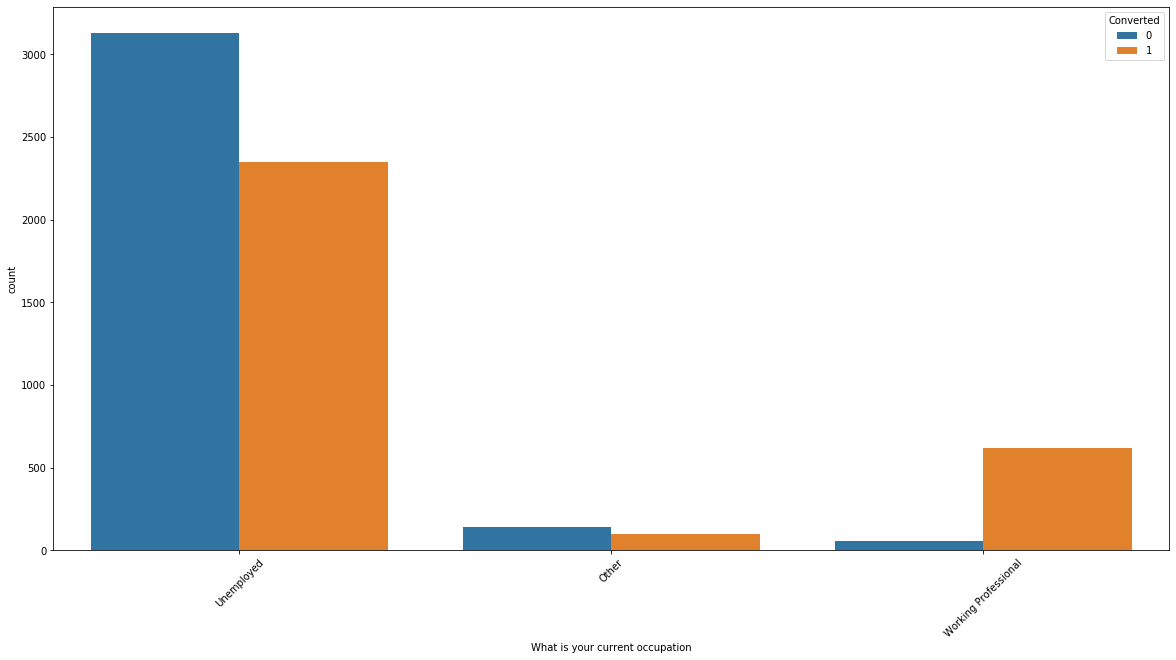

What is your current occupation  Converted
Other                            0             2.206228
                                 1             1.517759
Unemployed                       0            48.975121
                                 1            36.707870
Working Professional             0             0.860585
                                 1             9.732436
Name: What is your current occupation, dtype: float64
0.0


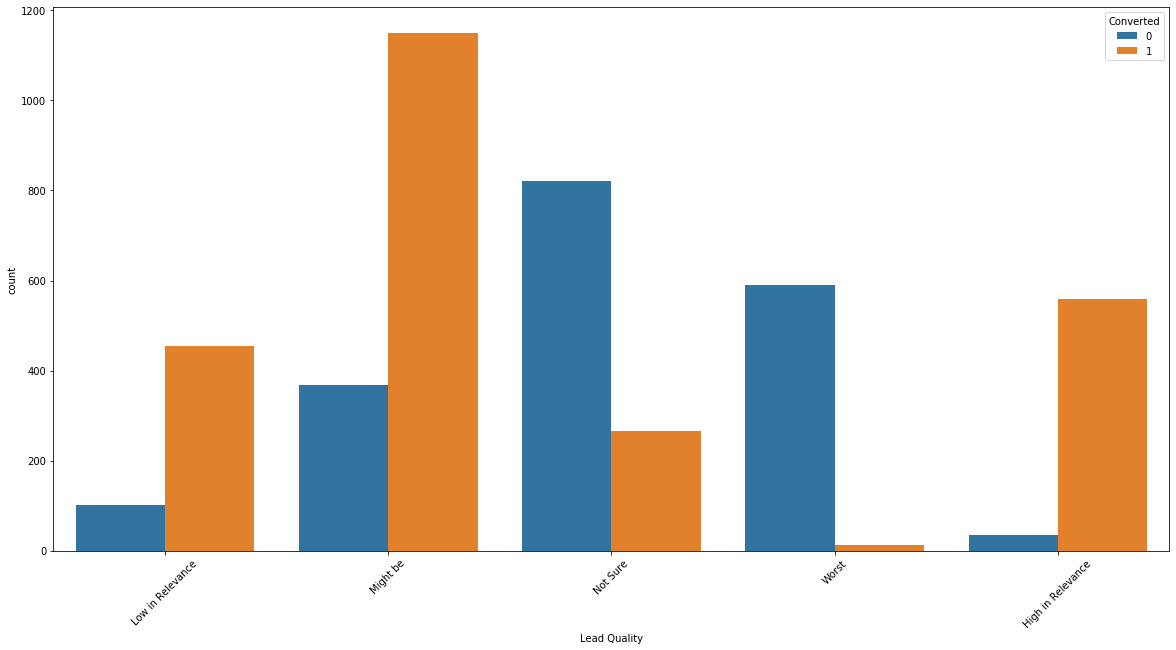

Lead Quality       Converted
High in Relevance  0             0.531998
                   1             8.731028
Low in Relevance   0             1.580347
                   1             7.119387
Might be           0             5.773744
                   1            17.994054
Not Sure           0            12.830543
                   1             4.162103
Worst              0             9.216085
                   1             0.187764
Name: Lead Quality, dtype: float64
31.87294633077766


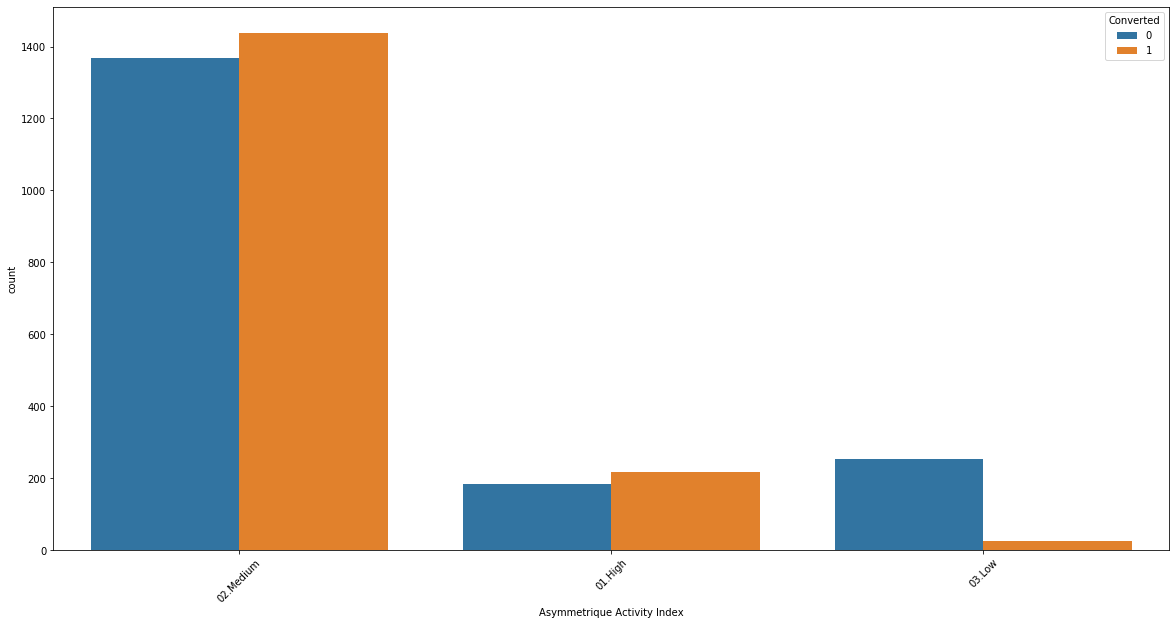

Asymmetrique Activity Index  Converted
01.High                      0             2.863402
                             1             3.411047
02.Medium                    0            21.420748
                             1            22.516038
03.Low                       0             3.958692
                             1             0.406822
Name: Asymmetrique Activity Index, dtype: float64
45.42325144734784


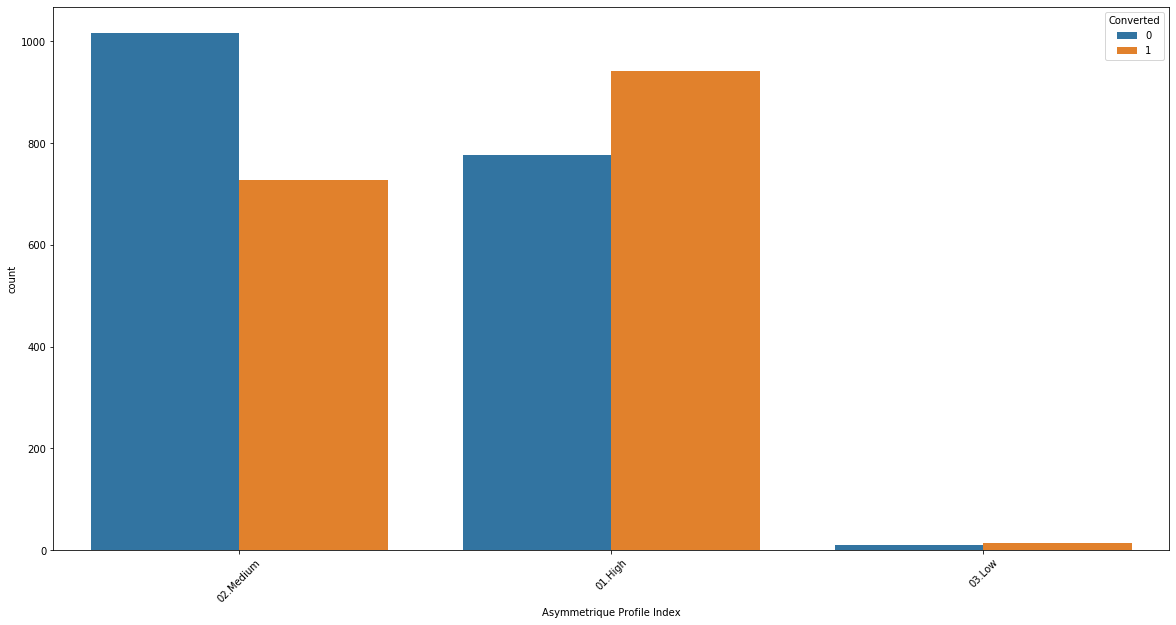

Asymmetrique Profile Index  Converted
01.High                     0            12.157722
                            1            14.723830
02.Medium                   0            15.913003
                            1            11.391019
03.Low                      0             0.172117
                            1             0.219058
Name: Asymmetrique Profile Index, dtype: float64
45.42325144734784


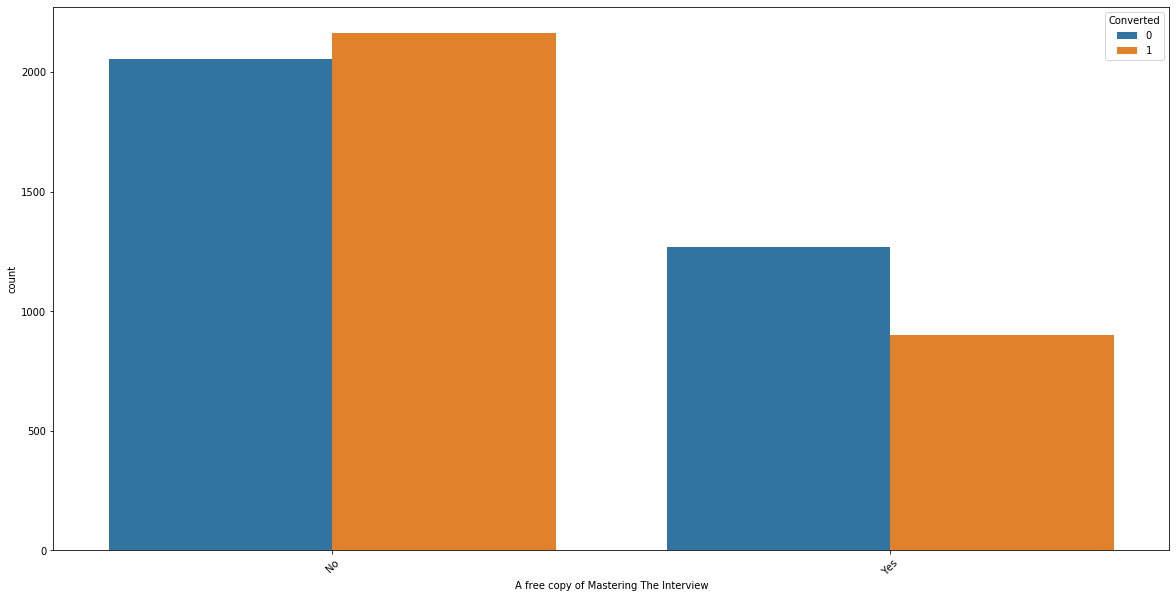

A free copy of Mastering The Interview  Converted
No                                      0            32.170239
                                        1            33.860116
Yes                                     0            19.871695
                                        1            14.097950
Name: A free copy of Mastering The Interview, dtype: float64
0.0


In [24]:
for i in cat.columns:
    plt.figure(figsize=[20,10])
    sns.countplot(x=i, hue='Converted', data=cat)
    plt.xlabel(i)
    plt.tick_params('x', rotation=45)
    plt.show()
    print(lead.groupby([i,'Converted'])[i].count()/lead.shape[0]*100)
    print(lead[i].isna().sum()/lead.shape[0]*100)

In [25]:
lead.isna().sum()/lead.shape[0]*100

Lead Origin                                0.000000
Lead Source                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.000000
Last Activity                              0.000000
What is your current occupation            0.000000
Lead Quality                              31.872946
Asymmetrique Activity Index               45.423251
Asymmetrique Profile Index                45.423251
Asymmetrique Activity Score               45.423251
Asymmetrique Profile Score                45.423251
A free copy of Mastering The Interview     0.000000
dtype: float64

In [26]:
lead.shape

(6391, 15)

In [27]:
# These are the leads which have more than 30% of data missing
for i in lead.columns:
    if lead[i].isna().sum()/lead.shape[0]>0.3:
        lead.drop(i, axis=1, inplace=True)

In [28]:
lead.shape

(6391, 10)

In [29]:
lead.isna().sum()/lead.shape[0]*100

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [30]:
cont = lead.select_dtypes(exclude=[object])
sns.pairplot(cont, hue='Converted', data=cont)

TypeError: pairplot() got multiple values for argument 'data'

- As we can see there are some outliers in our continuous variable lets remove them

In [ ]:
cont.columns

In [ ]:
sns.boxplot(x='TotalVisits', data=cont)
print(cont['TotalVisits'].quantile(.250), cont['TotalVisits'].quantile(.75))
print((1-(1.5*4)), (5+(1.5*4)))

In [ ]:
sns.boxplot(x='Total Time Spent on Website', data=cont)
print(cont['Total Time Spent on Website'].quantile(.250), cont['Total Time Spent on Website'].quantile(.75))
print((34.5-(1.5*(1148-34.5))), (1148+(1.5*(1148-34.5))))

In [ ]:
sns.boxplot(x='Page Views Per Visit', data=cont)
print(cont['Page Views Per Visit'].quantile(.250), cont['Page Views Per Visit'].quantile(.75))
print((1-(1.5*3)), (4+(1.5*3)))

In [ ]:
lead.shape

In [ ]:
lead = lead[lead['Page Views Per Visit']>=-3.5]
lead = lead[lead['Page Views Per Visit']<=8.5]

In [ ]:
lead.shape

In [ ]:
lead = lead[lead['TotalVisits']>=-5]
lead = lead[lead['TotalVisits']<=11]

In [ ]:
lead.shape

In [ ]:
lead = lead[lead['Total Time Spent on Website']>=-1635.75]
lead = lead[lead['Total Time Spent on Website']<=2818.25]

In [ ]:
lead.shape

In [ ]:
6119/9240

- Our Data is cleaned and now we can use models to assign lead scores

## Data Transformation, Feature Selection and Modeling

1. Create Dummy Variables

In [ ]:
lead.head()

In [ ]:
temp = lead.select_dtypes(include=['object'])
temp.head()

In [ ]:
temp.columns

In [ ]:
temp = pd.get_dummies(temp,drop_first=True)

In [ ]:
temp.head(2)

In [ ]:
lead.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview'], axis =1, inplace=True)

In [ ]:
lead= pd.concat([lead, temp], axis=1)

In [ ]:
lead.head(2)

In [ ]:
lead.shape

In [ ]:
X = lead.iloc[:, 1:]
y = lead.iloc[:,0]
print(X.shape, y.shape)

2.1 Logistic Regression without feature selection and without standardizing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0, stratify=y)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [ ]:
y_test = y_test.values.reshape(-1,1)

In [ ]:
Lreg = LogisticRegression()
Lreg.fit(x_train, y_train)

In [ ]:
y_predict_test = Lreg.predict(x_test)
y_predict_train = Lreg.predict(x_train)

In [ ]:
score_test = accuracy_score(y_test, y_predict_test)
score_train = accuracy_score(y_train, y_predict_train)

In [ ]:
print('Test score: ',score_test)
print('Train score', score_train)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predict_test)
print(report)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix = confusion_matrix(y_test, y_predict_test)

In [ ]:
matrix

In [ ]:
import statsmodels.api as sm

In [ ]:
x = sm.add_constant(X)
model = sm.Logit(y, x).fit()
model.summary()

- As we can see some features have high p value so we need to either drop them or use feature selection

2.2 Logistic Regression without Feature Selection with Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] = scale.fit_transform(x_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] )

In [ ]:
x_train.head(2)

In [ ]:
Lreg.fit(x_train, y_train)

In [ ]:
x_test[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] = scale.fit_transform(x_test[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] )

In [ ]:
y_predict_test = Lreg.predict(x_test)
y_predict_train = Lreg.predict(x_train)

In [ ]:
score_test = accuracy_score(y_test, y_predict_test)
score_train = accuracy_score(y_train, y_predict_train)

In [ ]:
print('Test score: ',score_test)
print('Train score', score_train)

In [ ]:
print(classification_report(y_test, y_predict_test))

- As we can see, there's no slight change after standardization

3. Logistic regression with Feature Selection

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe = RFE(Lreg, 12)
rfe.fit(x_train, y_train)

In [ ]:
list(zip(x_train.columns,rfe.support_, rfe.ranking_))

In [ ]:
col = x_train.columns[rfe.support_]

In [ ]:
x_train = x_train[col]

In [ ]:
x_train.columns

In [ ]:
x = sm.add_constant(x_train)
model = sm.Logit(y_train, x).fit()
model.summary()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values('VIF',ascending = False)
vif

In [ ]:
x_train.drop(['Lead Origin_Lead Add Form'], axis = 1, inplace=True)

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values('VIF',ascending = False)
vif

In [ ]:
x = sm.add_constant(x_train)
model = sm.Logit(y_train, x).fit()
model.summary()

In [ ]:
x_train.drop(['What is your current occupation_Unemployed'], axis = 1, inplace=True)

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values('VIF',ascending = False)
vif

In [ ]:
x = sm.add_constant(x_train)
model = sm.Logit(y_train, x).fit()
model.summary()

- I think it should do the job, I have checked almost everything includes p values, vif, best features etc

In [ ]:
Lreg.fit(x_train, y_train)

In [ ]:
x_train.columns

In [ ]:
x_test= x_test[x_train.columns]

In [ ]:
y_predict_test =Lreg.predict(x_test)
y_predict_train = Lreg.predict(x_train)

In [ ]:
score_test = accuracy_score(y_test, y_predict_test)
score_train = accuracy_score(y_train, y_predict_train)

In [ ]:
print('Test score: ',score_test)
print('Train score', score_train)

In [ ]:
print(classification_report(y_test, y_predict_test))

In [ ]:
matrix = confusion_matrix(y_test, y_predict_test)

In [ ]:
matrix

In [ ]:
y_prob_test = Lreg.predict_proba(x_test)[:,1]
y_prob_train = Lreg.predict_proba(x_train)[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train.values.reshape(-1,1), y_prob_train)

In [ ]:
prob_score = roc_auc_score(y_train.values.reshape(-1,1), y_prob_train)
prob_score

In [ ]:
roc_auc = auc(fpr, tpr)
roc_auc

In [ ]:
plt.plot(fpr, tpr, color = 'b', label='Roc Curve (area = %2f)' %roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Example')
plt.legend(loc='lower right')  # to show the area in lower right
plt.show()

In [ ]:
i = np.arange(len(tpr))
optimal_threshold = pd.DataFrame({'fpr' : pd.Series(fpr, index = i), 'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index=i),
                                  'tf' : pd.Series(tpr-(1-fpr), index=i),'threshold' : pd.Series(thresholds.round(2), index=i)})
abs(optimal_threshold).sort_values('tf', ascending=True).head()

In [ ]:
from sklearn.preprocessing import binarize
y_predict_train = binarize(y_prob_train.reshape(-1,1), 0.44)

In [ ]:
accuracy_score(y_predict_train.reshape(-1,1), y_train)

In [ ]:
y_predict_test = binarize(y_prob_test.reshape(-1,1), 0.44)
accuracy_score(y_test, y_predict_test)

In [ ]:
plt.plot(optimal_threshold.set_index('threshold').tpr)
plt.plot(optimal_threshold.set_index('threshold')['1-fpr'])


In [ ]:
result = pd.DataFrame(data=[y_test.flatten(), y_predict_test.astype(int).flatten()]).T
result.columns = ['Actual Conversion', 'Predicted Conversion']
result.head()

score = pd.DataFrame(data=[y_test.flatten(), y_prob_test.flatten()]).T
score.columns = ['Actual Conversion', 'Lead Score']
score.head()